In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re
import random
import seaborn as sns
import datetime
import mplfinance as mpf
from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize    # for function minimization

import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product               
from tqdm import tqdm_notebook

%matplotlib inline

# Part 1: Importing Dataset

In [1]:
# directory = "C:/Users/garyh/Downloads/"
directory = "C:/Users/joeyh/OneDrive/Applied Data Science with Machine Learning/DS106_Capstone Project/"
EURUSD = pd.read_csv(directory + 'EURUSD60.csv',names=['date','time', 'open', 'high', 'low', 'close', 'volume'])

NameError: name 'pd' is not defined

In [3]:
EURUSD.head(3)

date   time     open     high      low    close  volume
0  2010.10.21  15:00  1.40200  1.40325  1.39772  1.39907    3479
1  2010.10.21  16:00  1.39910  1.40142  1.39657  1.40036    3667
2  2010.10.21  17:00  1.40039  1.40368  1.39862  1.40021    4126

In [4]:
EURUSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65000 non-null  object 
 1   time    65000 non-null  object 
 2   open    65000 non-null  float64
 3   high    65000 non-null  float64
 4   low     65000 non-null  float64
 5   close   65000 non-null  float64
 6   volume  65000 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.5+ MB


# Part 2: Data Exploration and Preprocessing

In [5]:
import time
time.time()
EURUSD.insert(0, 'datetime', '')
EURUSD['datetime'] = EURUSD['date'] + ' ' + EURUSD['time']
EURUSD['datetime'] = pd.to_datetime(EURUSD['datetime'])
EURUSD

datetime        date   time     open     high      low  \
0     2010-10-21 15:00:00  2010.10.21  15:00  1.40200  1.40325  1.39772   
1     2010-10-21 16:00:00  2010.10.21  16:00  1.39910  1.40142  1.39657   
2     2010-10-21 17:00:00  2010.10.21  17:00  1.40039  1.40368  1.39862   
3     2010-10-21 18:00:00  2010.10.21  18:00  1.40027  1.40120  1.39497   
4     2010-10-21 19:00:00  2010.10.21  19:00  1.39724  1.39813  1.39299   
...                   ...         ...    ...      ...      ...      ...   
64995 2021-04-16 20:00:00  2021.04.16  20:00  1.19785  1.19808  1.19756   
64996 2021-04-16 21:00:00  2021.04.16  21:00  1.19807  1.19836  1.19769   
64997 2021-04-16 22:00:00  2021.04.16  22:00  1.19769  1.19796  1.19725   
64998 2021-04-16 23:00:00  2021.04.16  23:00  1.19783  1.19823  1.19783   
64999 2021-04-17 00:00:00  2021.04.17  00:00  1.19813  1.19826  1.19803   

         close  volume  
0      1.39907    3479  
1      1.40036    3667  
2      1.40021    4126  
3      1.39726    3577  
4      1.39350    2960  
...        ...     ...  
64995  1.19808    1190  
64996  1.19769     670  
64997  1.19784     676  
64998  1.19813     988  
64999  1.19814     389  

[65000 rows x 8 columns]

In [6]:
EURUSD.drop('date', axis='columns', inplace=True)
EURUSD.drop('time', axis='columns', inplace=True)
EURUSD.head(3)

datetime     open     high      low    close  volume
0 2010-10-21 15:00:00  1.40200  1.40325  1.39772  1.39907    3479
1 2010-10-21 16:00:00  1.39910  1.40142  1.39657  1.40036    3667
2 2010-10-21 17:00:00  1.40039  1.40368  1.39862  1.40021    4126

In [7]:
EURUSD['datetime'].max() - EURUSD['datetime'].min()

Timedelta('3830 days 09:00:00')

In [8]:
EURUSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  65000 non-null  datetime64[ns]
 1   open      65000 non-null  float64       
 2   high      65000 non-null  float64       
 3   low       65000 non-null  float64       
 4   close     65000 non-null  float64       
 5   volume    65000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.0 MB


In [9]:
EURUSD = EURUSD.set_index('datetime')
EURUSD.index = pd.date_range(datetime.datetime(2010, 10, 21,15,0,0), periods=65000, freq="H")

In [10]:
EURUSD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65000 entries, 2010-10-21 15:00:00 to 2018-03-21 22:00:00
Freq: H
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    65000 non-null  float64
 1   high    65000 non-null  float64
 2   low     65000 non-null  float64
 3   close   65000 non-null  float64
 4   volume  65000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.0 MB


In [11]:
EURUSD.tail(3)

open     high      low    close  volume
2018-03-21 20:00:00  1.19769  1.19796  1.19725  1.19784     676
2018-03-21 21:00:00  1.19783  1.19823  1.19783  1.19813     988
2018-03-21 22:00:00  1.19813  1.19826  1.19803  1.19814     389

In [12]:
EURUSD.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

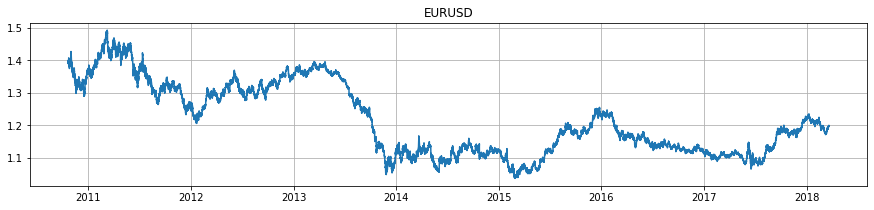

In [13]:
plt.figure(figsize=(15, 3))
plt.plot(EURUSD.close)
plt.title('EURUSD')
plt.grid(True)
plt.show()

In [14]:
# Ploting candle stick chart
# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',volume=True,figratio=(15,5),figscale=1)


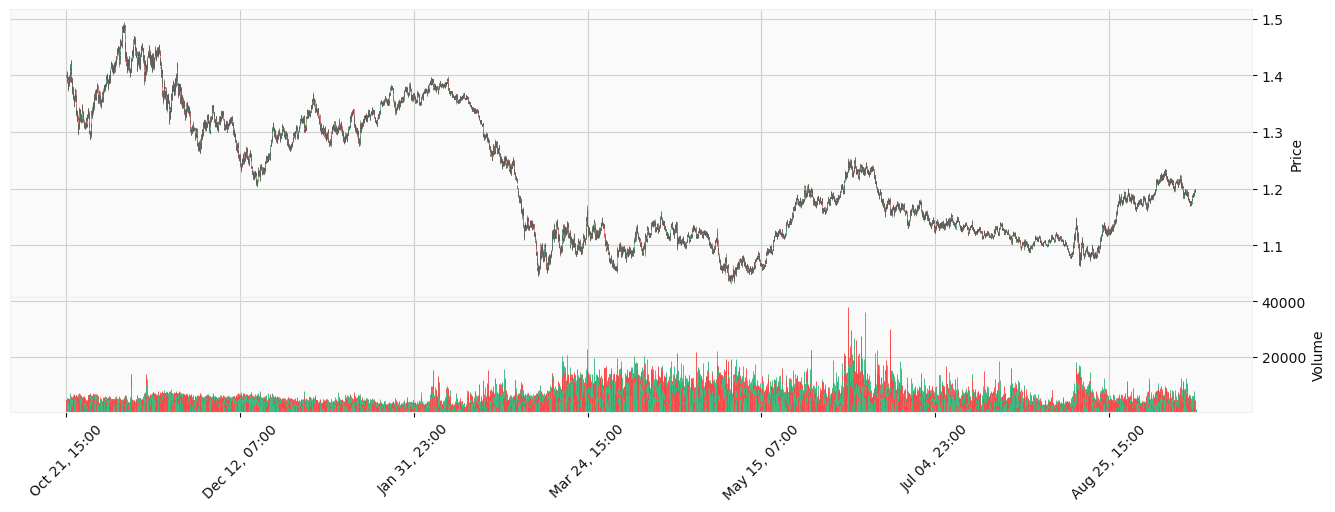

In [15]:
mpf.plot(EURUSD, **kwargs,style='yahoo')

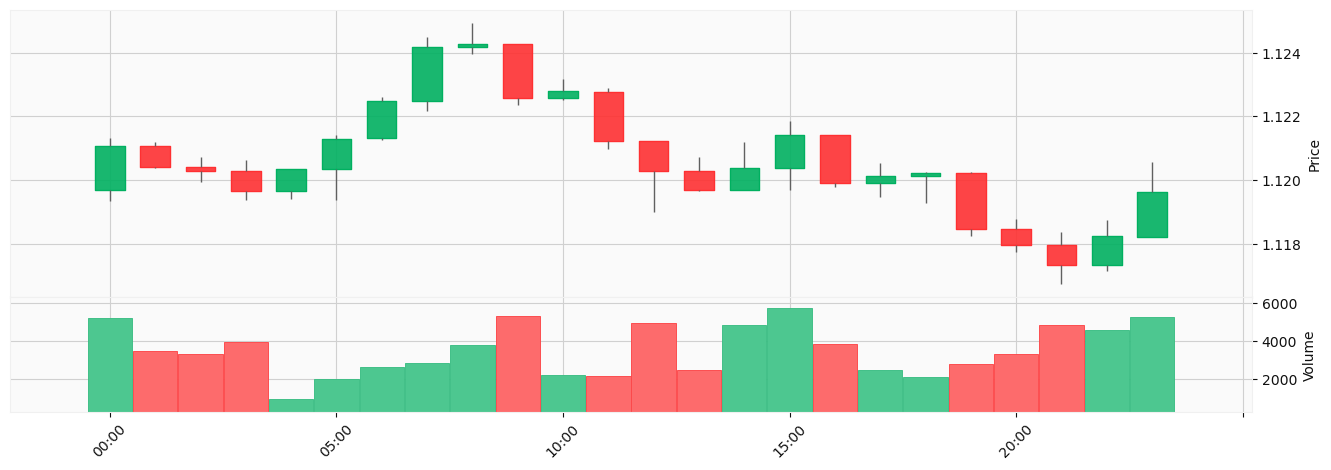

In [16]:
# Zoom in view of section of the data
mpf.plot(EURUSD[datetime.datetime(2017, 1, 7,0,0,0):datetime.datetime(2017, 1, 7,23,0)], **kwargs,style='yahoo')

In [17]:
EURUSD.head(3)

open     high      low    close  volume
2010-10-21 15:00:00  1.40200  1.40325  1.39772  1.39907    3479
2010-10-21 16:00:00  1.39910  1.40142  1.39657  1.40036    3667
2010-10-21 17:00:00  1.40039  1.40368  1.39862  1.40021    4126

# Part 3: Time Series Analysis with Statmodels

In [18]:
def moving_average(series, n):
    return np.average(series[-n:])

In [19]:
moving_average(EURUSD, 24) 

326.4245029166667

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """

In [20]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,3))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
            plt.plot(series[window:], label="Actual values")
            plt.legend(loc="upper left")
            plt.grid(True)

we try to smoothing by the previous 4,12,24hours

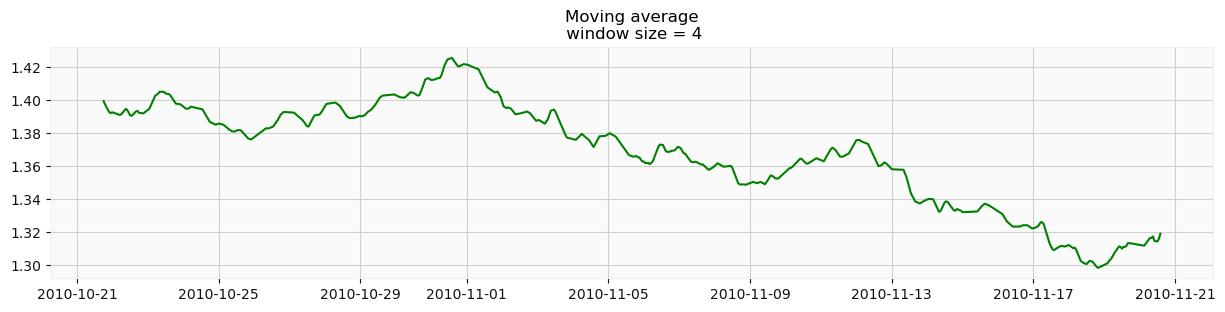

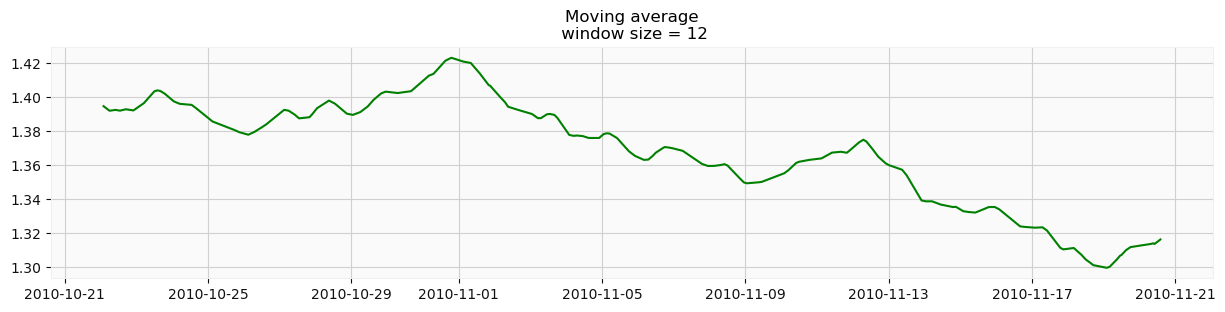

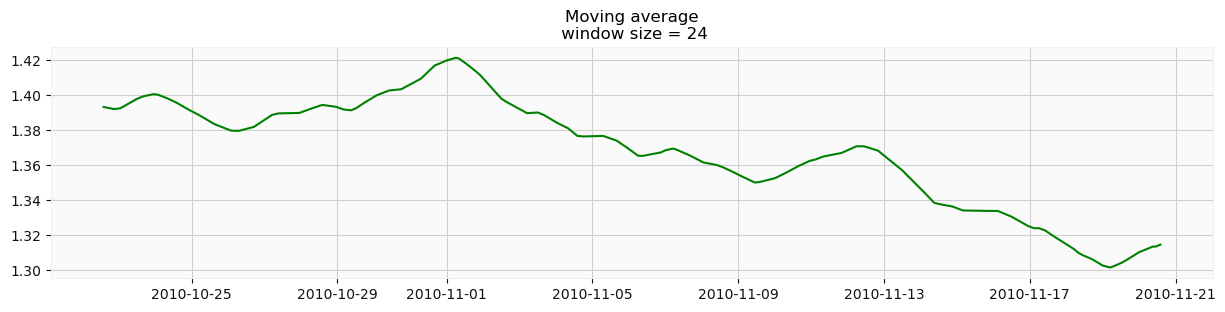

In [21]:
plotMovingAverage(EURUSD.close[:720], 4) # 30days x 24hours = 720hours
plotMovingAverage(EURUSD.close[:720], 12) # 30days x 24hours = 720hours
plotMovingAverage(EURUSD.close[:720], 24) # 30days x 24hours = 720hours

> <font color='green'> * **OBSERVATION:** <br>  When we applied moving average smoothing on hourly data, we could clearly see the dynamics of EURUSD watched. The greater the window size, the greater the smoothing effect.</font> 
>

In [22]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

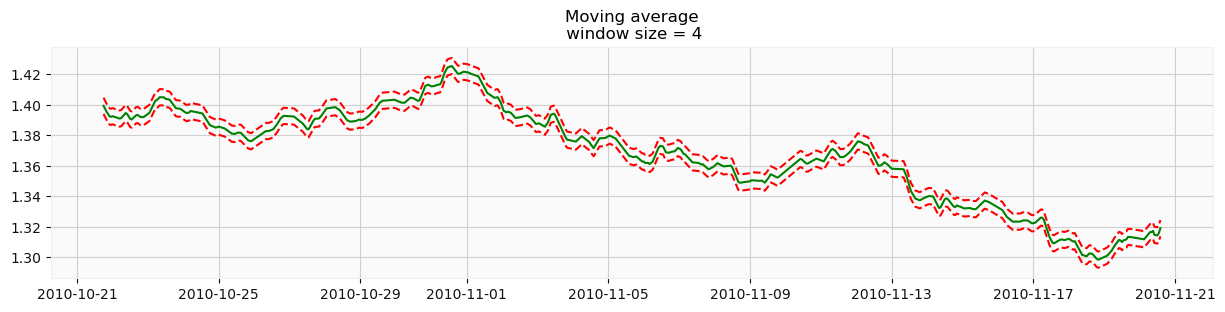

In [23]:
# Plot with confidence level
plotMovingAverage(EURUSD.close[:720], 4, plot_intervals=True)

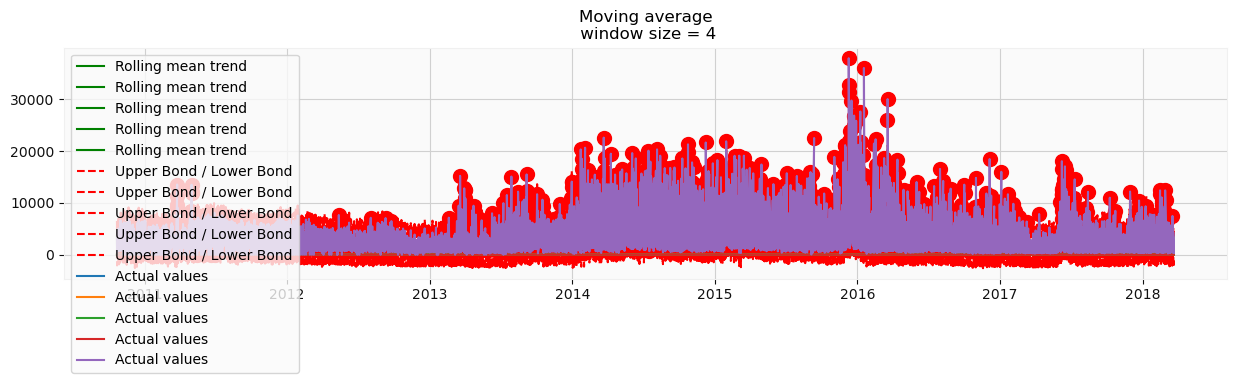

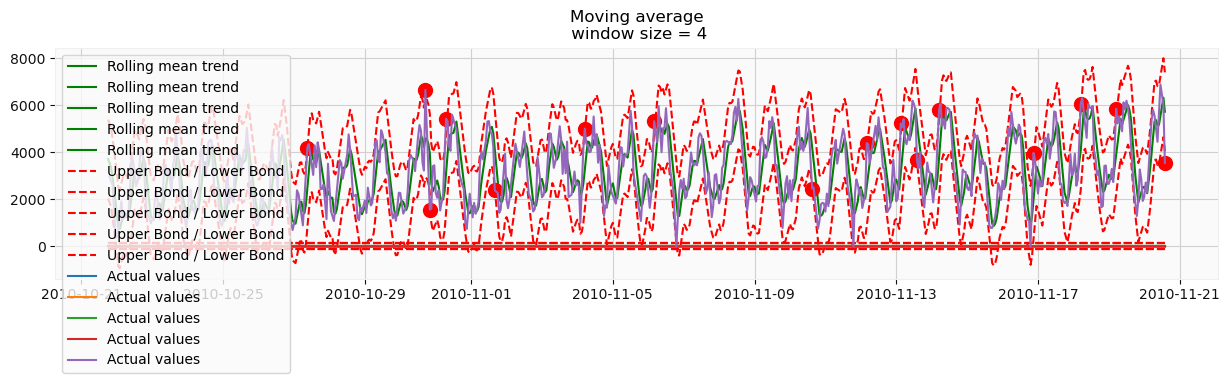

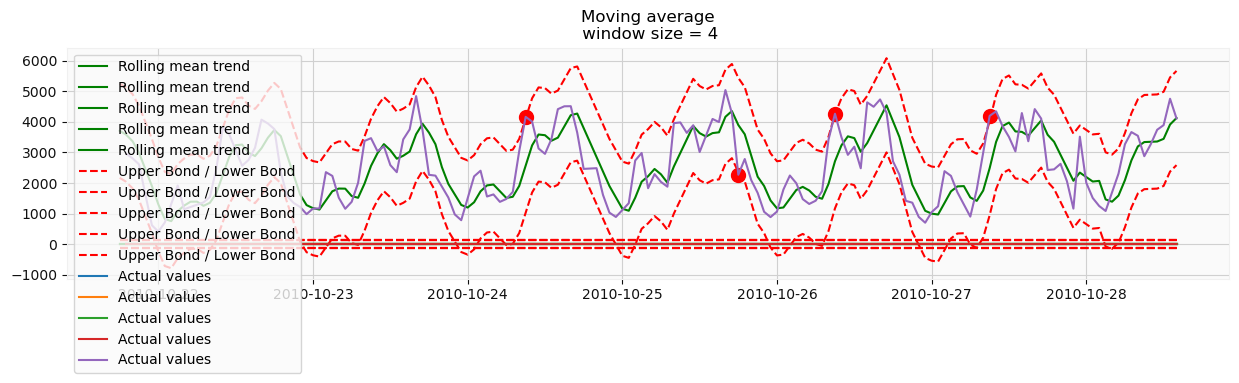

In [24]:
# Plot with confidence level and anomalies
plotMovingAverage(EURUSD, 4, plot_intervals=True, plot_anomalies=True)
plotMovingAverage(EURUSD[:720], 4, plot_intervals=True, plot_anomalies=True) # 720 hours = 30 days
plotMovingAverage(EURUSD[:168], 4, plot_intervals=True, plot_anomalies=True) # 168 hours = 7 days

> <font color='green'> * **OBSERVATION:** <br>  With this simple approach, we observed the trend for monthly and weekly trend together with anomalies when then average cross with upper or lower bond. .</font> 

## Weighted Average

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

In [25]:
def weighted_average(series, weights):
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return str(result)

In [26]:
weighted_average(EURUSD, [0.6, 0.3, 0.1])

'open        1.197996\nhigh        1.198221\nlow         1.197892\nclose       1.198107\nvolume    597.400000\nName: 2018-03-21 22:00:00, dtype: float64'

    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """

    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """

## Exponential Smoothing <br>
y^t=α⋅yt+(1−α)⋅y^t−1 <br>

Here the model value is a weighted average between the current true value and the previous model values. The  α  weight is called a smoothing factor. It defines how quickly we will "forget" the last available true observation. The smaller  α  is, the more influence the previous observations have and the smoother the series is.

### Simple Exponential Smoothing

In [27]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

    """
        Plots exponential smoothing with different alphas        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """

In [28]:
def plotExponentialSmoothing(series, alphas):

    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 3))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

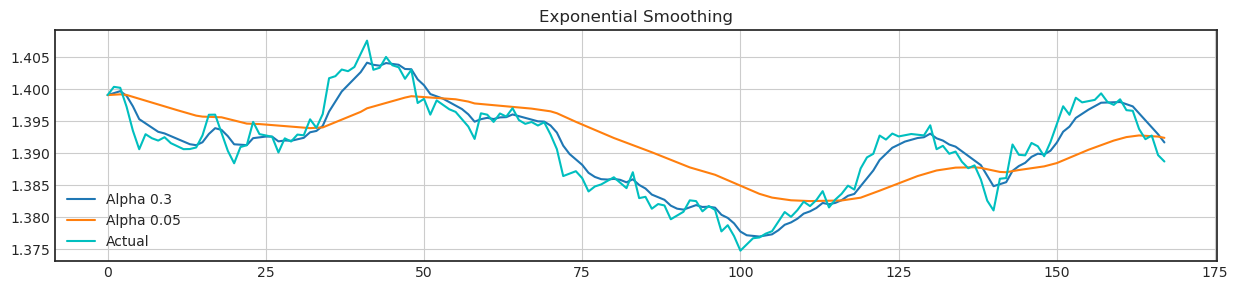

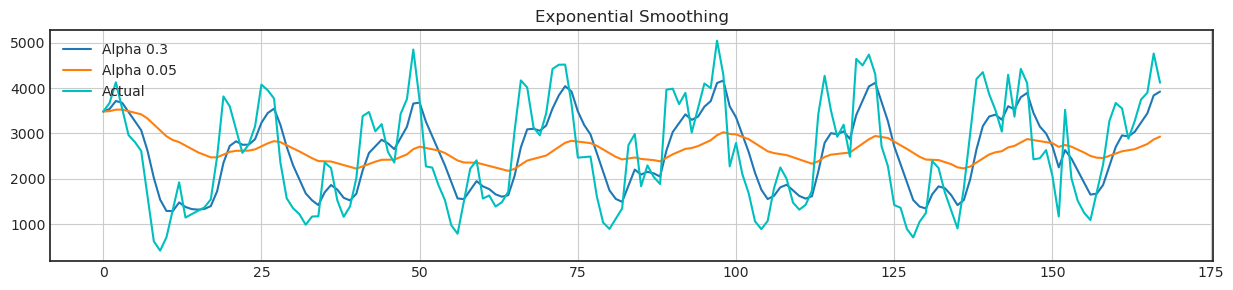

In [29]:
plotExponentialSmoothing(EURUSD.close[:168], [0.3, 0.05]) # # 168 hours = 7 days
plotExponentialSmoothing(EURUSD.volume[:168], [0.3, 0.05]) # # 168 hours = 7 days

### Double Exponential Smoothing

    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """

In [30]:
def double_exponential_smoothing(series, alpha, beta):
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
            last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """

In [31]:
def plotDoubleExponentialSmoothing(series, alphas, betas):
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 3))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

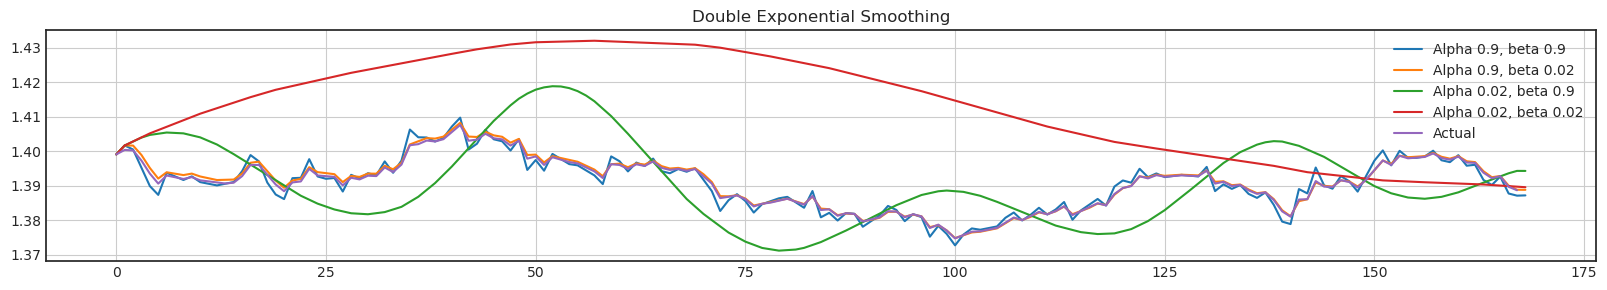

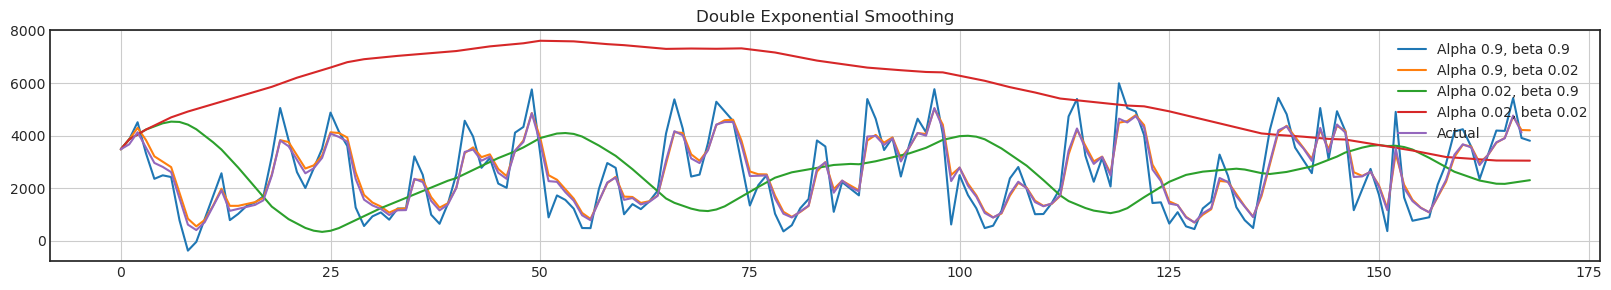

In [32]:
plotDoubleExponentialSmoothing(EURUSD.close[:168], alphas=[0.9, 0.02], betas=[0.9, 0.02]) # 168 hours = 7 days
plotDoubleExponentialSmoothing(EURUSD.volume[:168], alphas=[0.9, 0.02], betas=[0.9, 0.02]) # 168 hours = 7 days

    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """

# Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the Holt-Winters Methods. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

## 90% - 10% Split

In [33]:
train_data = EURUSD.iloc[:-6500] # 90% as train set
test_data = EURUSD.iloc[-6500:] # 10% as train set (6500 rows = 9 months)


In [34]:
%%time
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['close'],trend='mul',seasonal='mul',seasonal_periods=168).fit()

Wall time: 27.8 s


In [35]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(6500).rename('HW Forecast')

In [36]:
display(EURUSD[-6500:].head(1))
display(EURUSD[-6500:].tail(1))

open    high      low    close  volume
2017-06-24 03:00:00  1.10142  1.1018  1.09672  1.09707    7228

open     high      low    close  volume
2018-03-21 22:00:00  1.19813  1.19826  1.19803  1.19814     389

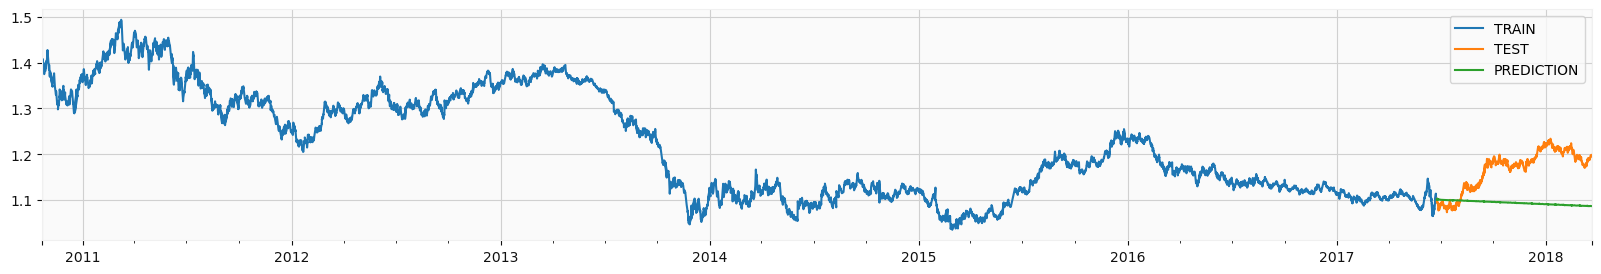

In [37]:
train_data['close'].plot(legend=True,label='TRAIN')
test_data['close'].plot(legend=True,label='TEST',figsize=(20,3));
test_predictions.plot(legend=True,label='PREDICTION');

<AxesSubplot:>

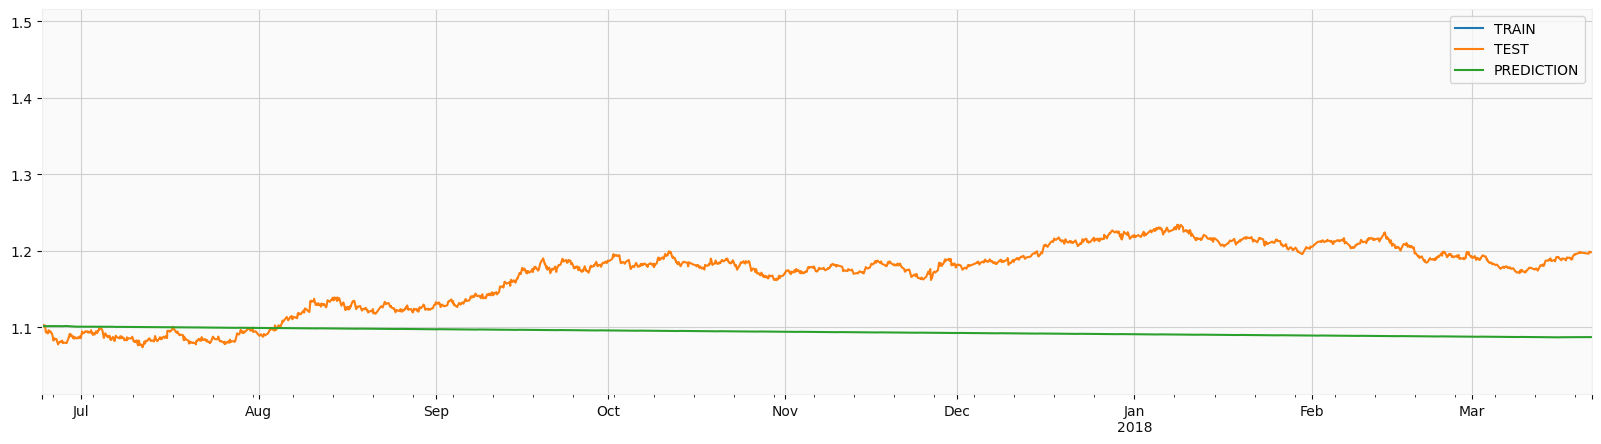

In [38]:
train_data['close'].plot(legend=True,label='TRAIN')
test_data['close'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',figsize=(20,5),xlim=[datetime.datetime(2017, 6, 24,3,0,0), datetime.datetime(2018, 3, 21,22,0)])

## Evaluation Metrics

In [39]:
df_metric_summary = pd.DataFrame([],columns=['Forecast', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
df_metric = pd.DataFrame(data=[["10%_Data",
                             mean_absolute_error(test_data['close'],test_predictions),
                             mean_squared_error(test_data['close'],test_predictions),
                             np.sqrt(mean_squared_error(test_data['close'],test_predictions)),
                             r2_score(test_data['close'],test_predictions)]],
                      columns=['Forecast', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

df_metric_summary = df_metric_summary.append(df_metric, ignore_index=True)
df_metric_summary

Forecast       MAE       MSE      RMSE  R2 Square
0  10%_Data  0.076983  0.007548  0.086881  -3.018601

### Forecast 1-Week

In [40]:
train_data = EURUSD.iloc[:-168] # All data as train set except the last month
test_data = EURUSD.iloc[-168:] # Last month data as train set (168 hours = 7 days)

In [41]:
%%time
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['close'],trend='mul',seasonal='mul',seasonal_periods=168).fit()

Wall time: 36 s


In [42]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(168).rename('HW Forecast')

In [43]:
display(EURUSD[-168:].head(1))
display(EURUSD[-168:].tail(1))

open     high      low    close  volume
2018-03-14 23:00:00  1.18666  1.18691  1.18626  1.18681     403

open     high      low    close  volume
2018-03-21 22:00:00  1.19813  1.19826  1.19803  1.19814     389

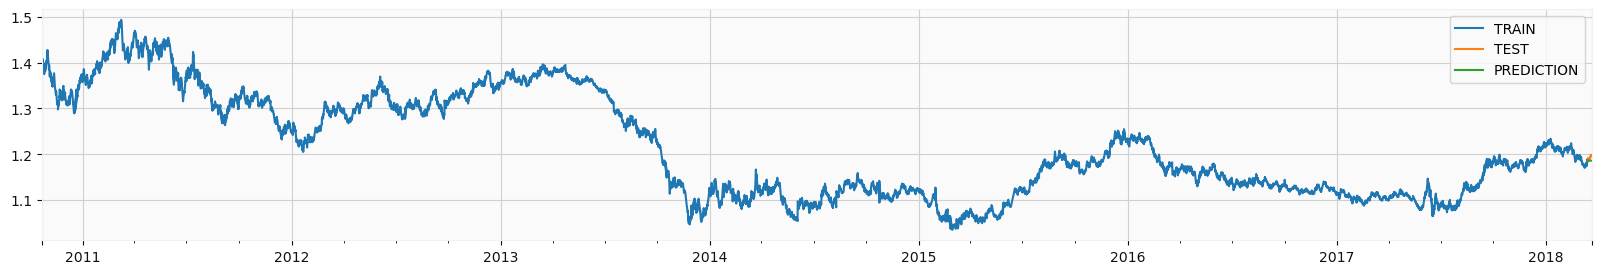

In [44]:
train_data['close'].plot(legend=True,label='TRAIN')
test_data['close'].plot(legend=True,label='TEST',figsize=(20,3));
test_predictions.plot(legend=True,label='PREDICTION');

<AxesSubplot:>

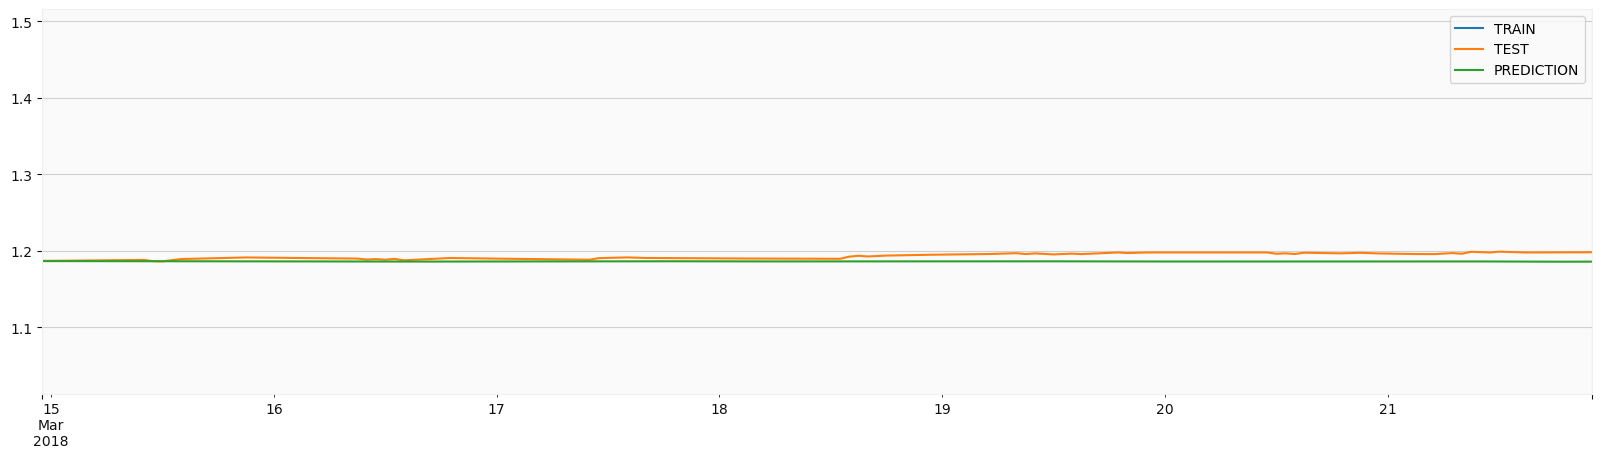

In [45]:
train_data['close'].plot(legend=True,label='TRAIN')
test_data['close'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',figsize=(20,5),xlim=[datetime.datetime(2018, 3, 14,23,0,0), datetime.datetime(2018, 3, 21,22,0)])

In [46]:
df_metric = pd.DataFrame(data=[["1-Week",
                             mean_absolute_error(test_data['close'],test_predictions),
                             mean_squared_error(test_data['close'],test_predictions),
                             np.sqrt(mean_squared_error(test_data['close'],test_predictions)),
                             r2_score(test_data['close'],test_predictions)]],
                      columns=['Forecast', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

df_metric_summary = df_metric_summary.append(df_metric, ignore_index=True)
df_metric_summary

Forecast       MAE       MSE      RMSE  R2 Square
0  10%_Data  0.076983  0.007548  0.086881  -3.018601
1    1-Week  0.006828  0.000062  0.007886  -3.239620

In [47]:
class HoltWinters:
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                self.PredictedDeviation.append(0)
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor *
                                      self.PredictedDeviation[0])
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                        self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01)
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])
            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

we can find the optimal parameters for the Holt-Winters model. Recall that we have daily seasonality in EURUSD, hence the slen=24 parameter.

"""
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """

In [48]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

choose an algorithm that supports constraints on model parameters

In the Holt-Winters model, as well as in the other models of exponential smoothing, there's a constraint on how large the smoothing parameters can be, each of them ranging from 0 to 1. Therefore, in order to minimize our loss function, we have to choose an algorithm that supports constraints on model parameters. In our case, we will use the truncated Newton conjugate gradient.

In [49]:
%%time

# First 80% of the 65000 rows of dataset for training = 52,000
data = EURUSD.close[:-168] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 168, scaling_factor = 3)
model.triple_exponential_smoothing()

0.0008548241022447445 0.00047390877705777434 0.0032052585032080194
Wall time: 3min 56s


    
    """ i add some code to render plots
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    

In [50]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    plt.figure(figsize=(20, 5))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

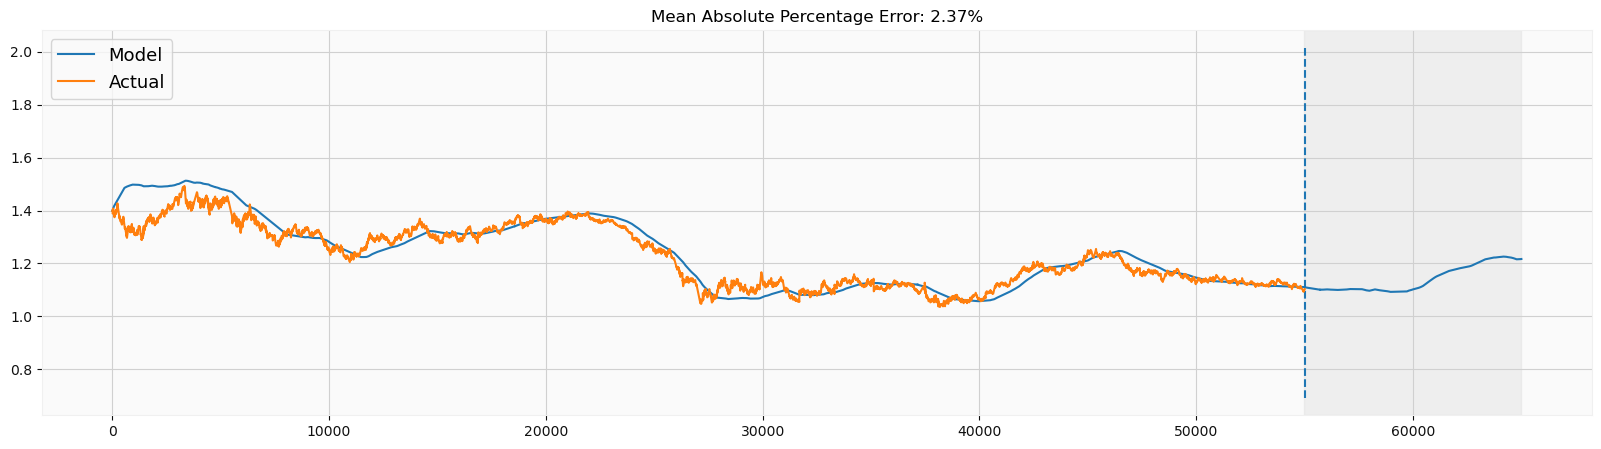

In [51]:
plotHoltWinters(EURUSD.close[:-10000])

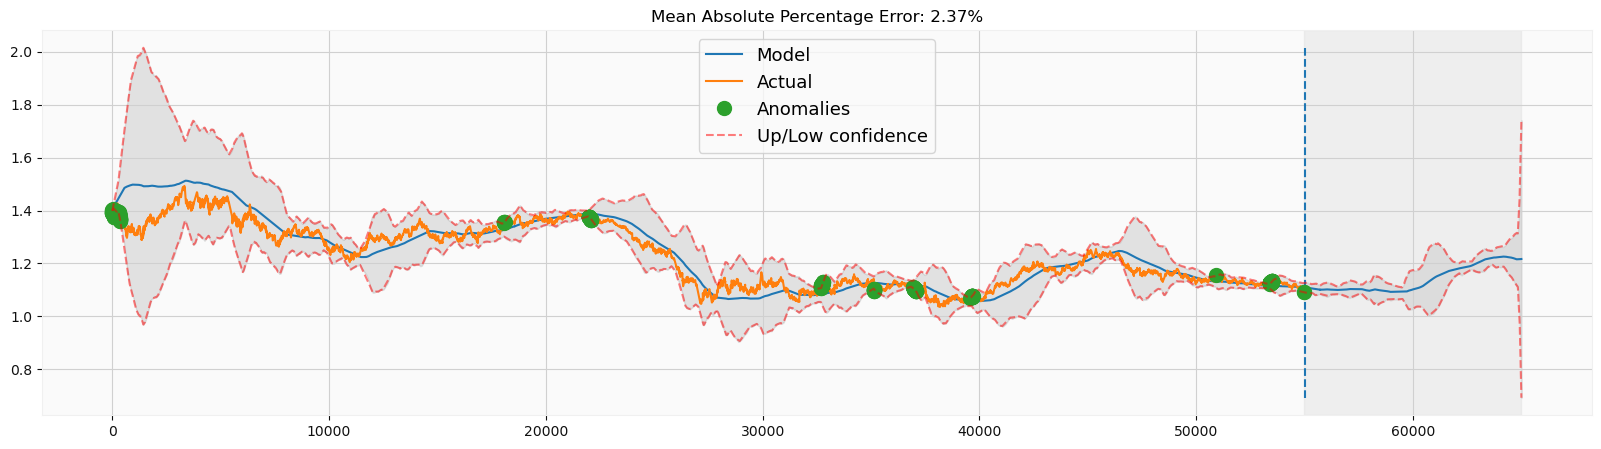

In [52]:
plotHoltWinters(EURUSD.close[:-10000], plot_intervals=True, plot_anomalies=True)

Judging by the plots, the model was able to successfully approximate the initial time series, capturing the daily seasonality, overall downwards trend, and even some anomalies. If you look at the model deviations, you can clearly see that the model reacts quite sharply to changes in the structure of the series but then quickly returns the deviation to the normal values, essentially "forgetting" the past. This feature of the model allows us to quickly build anomaly detection systems, even for noisy series data, without spending too much time and money on preparing the data and training the model.

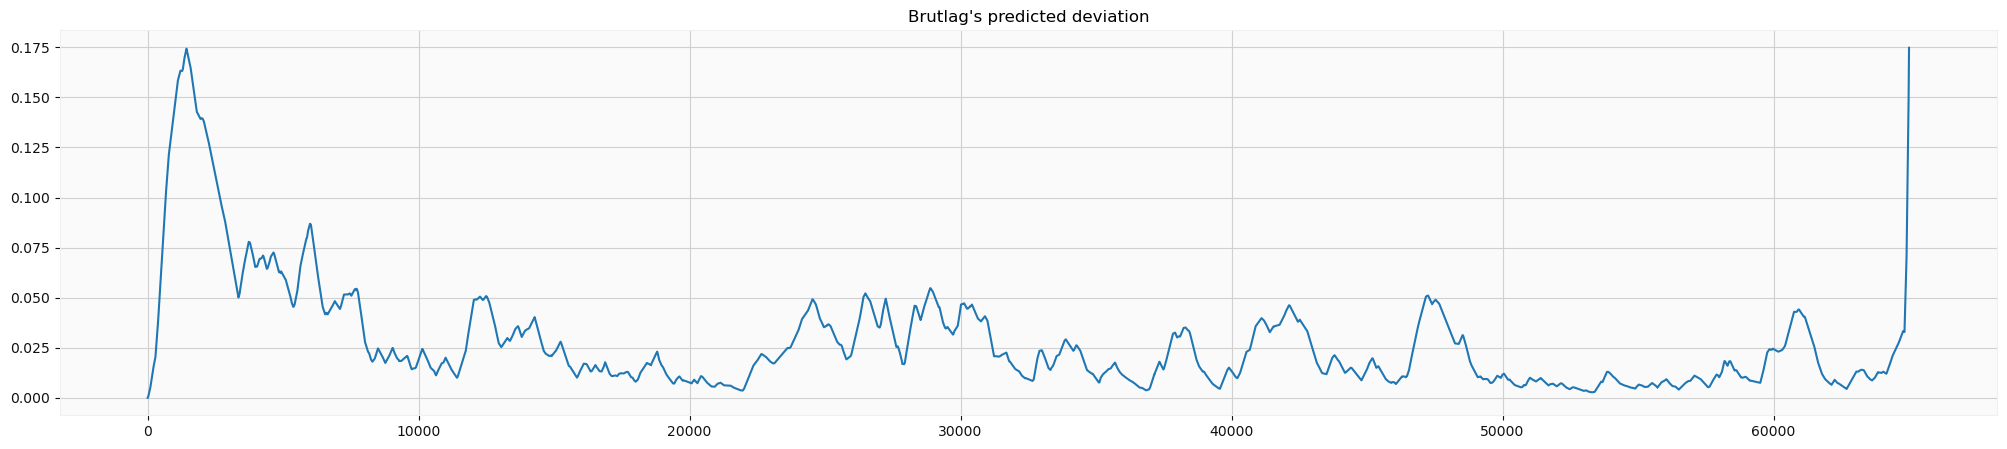

In [53]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

We'll apply the same algorithm for the second series which, as you may recall, has trend and a 30-day seasonality.

In [54]:
%%time
data = EURUSD.close[:-168]
slen = 30 # 30-day seasonality

x = [0, 0, 1] 

opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_percentage_error, slen), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final,
                    gamma = gamma_final, 
                    n_preds = 336, scaling_factor = 3)
model.triple_exponential_smoothing()

0.4531882084959861 0.002262822768463235 1.0
Wall time: 2min 31s


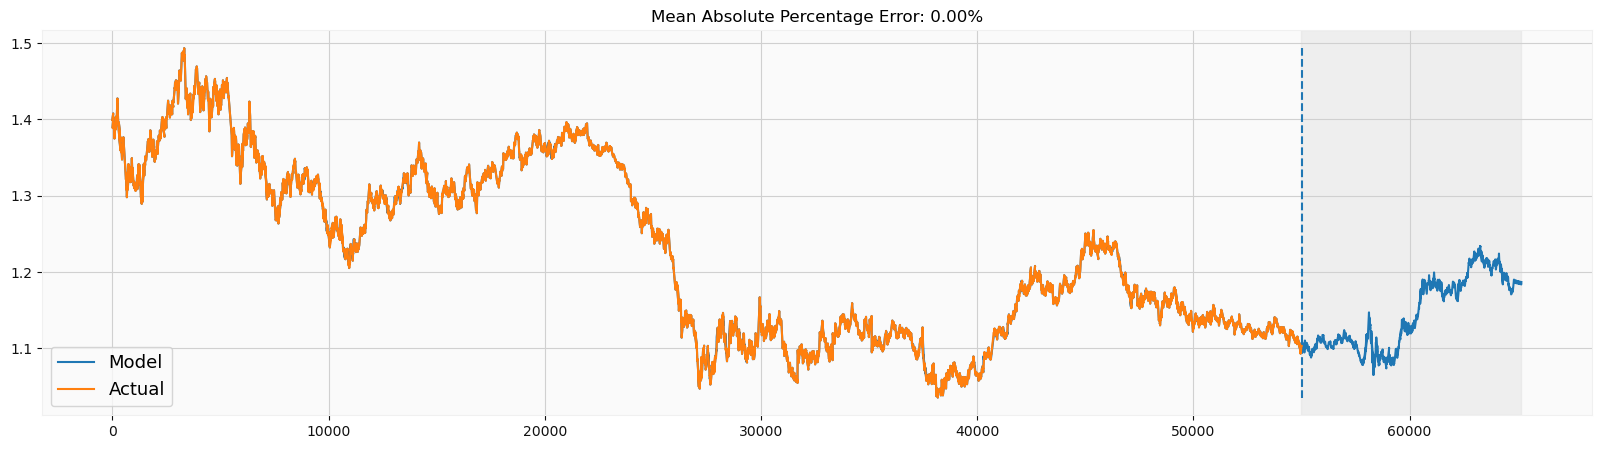

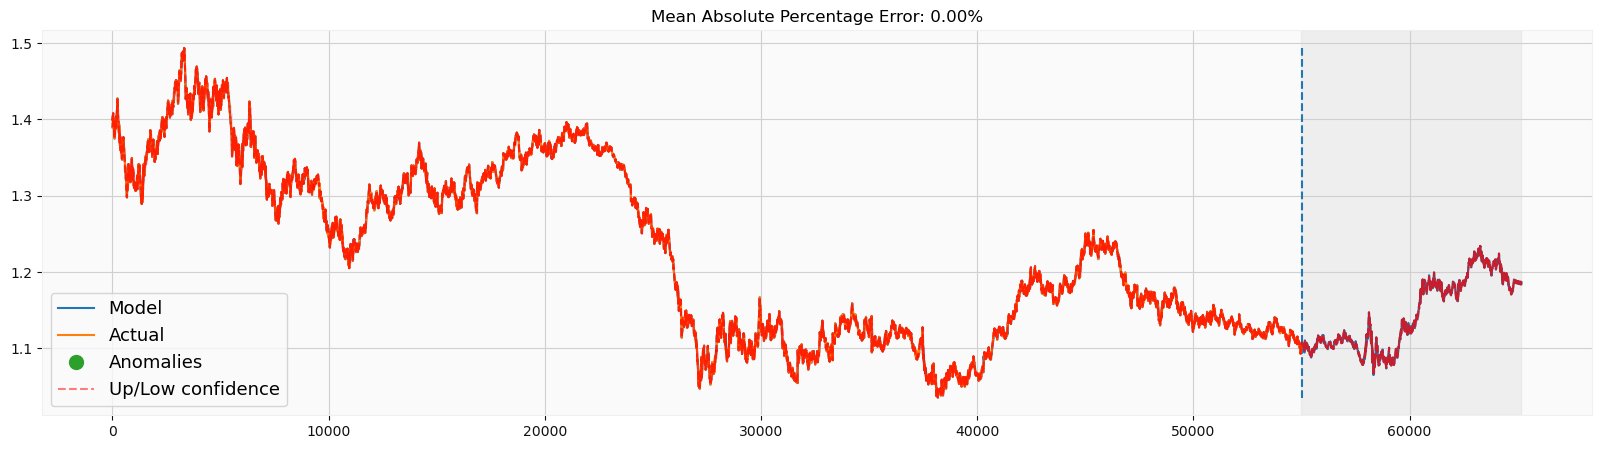

In [55]:
plotHoltWinters(EURUSD.close[:-10000])
plotHoltWinters(EURUSD.close[:-10000], plot_intervals=True, plot_anomalies=True)

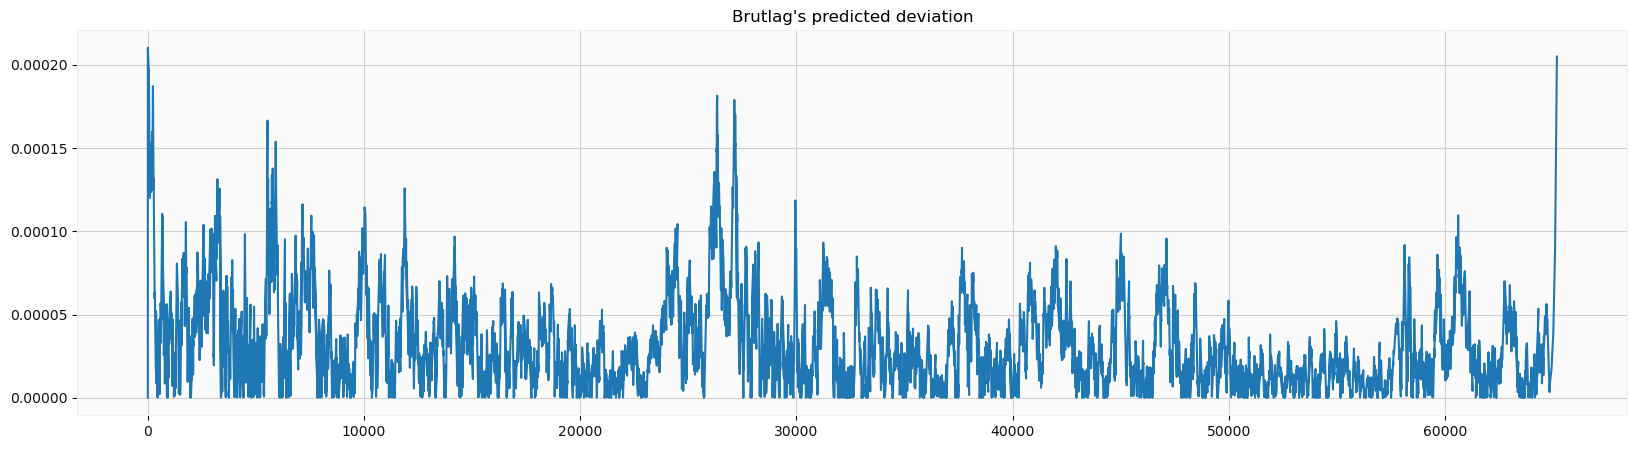

In [56]:
plt.figure(figsize=(20, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

White noise is an important concept in time series forecasting.

If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model

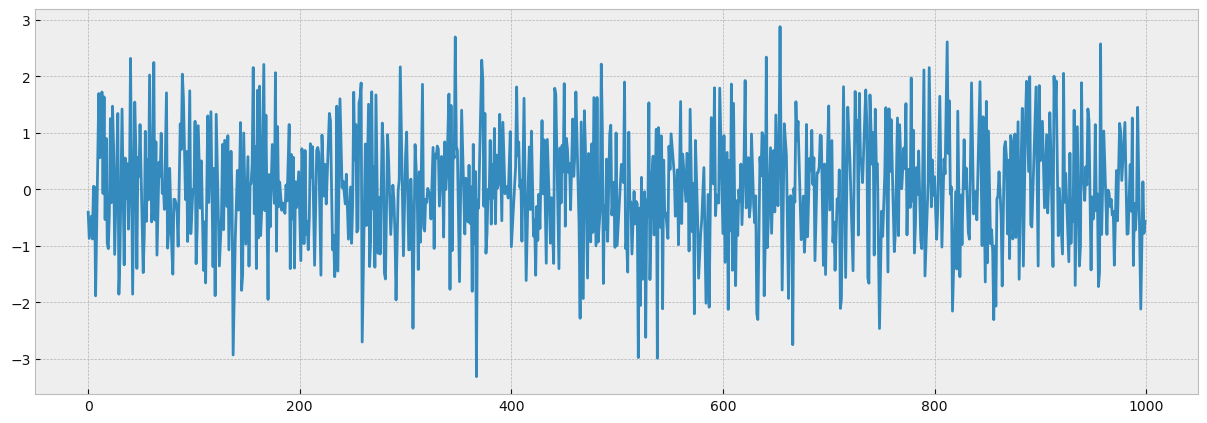

In [57]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

The process generated by the standard normal distribution is stationary and oscillates around 0 with with deviation of 1. Now, based on this process, we will generate a new one where each subsequent value will depend on the previous one

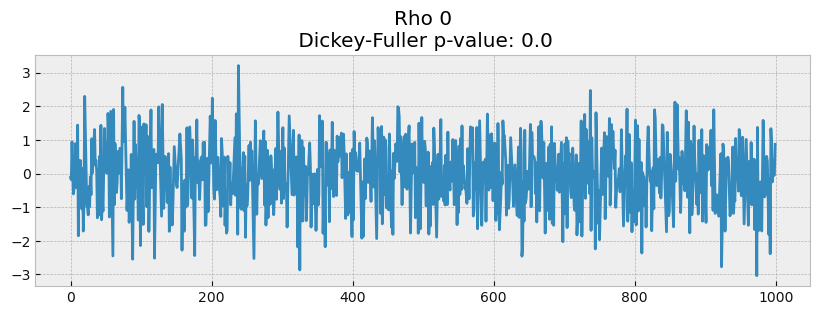

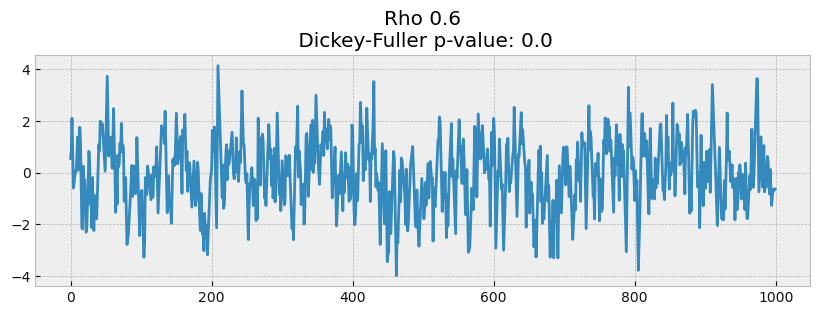

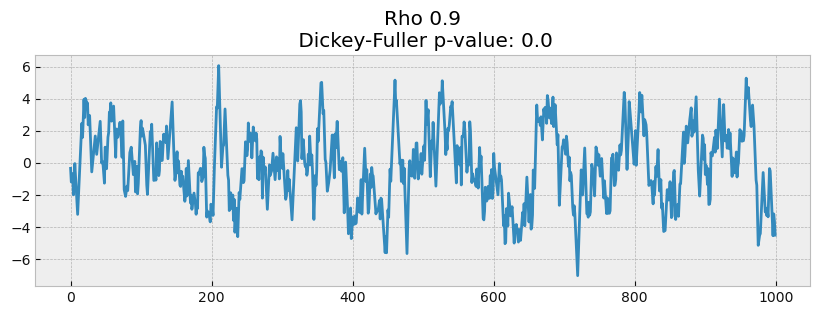

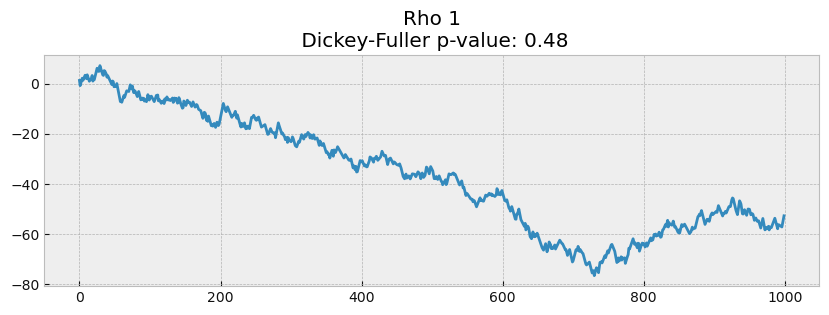

In [58]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

On the first plot, you can see the same stationary white noise as before. On the second plot with  ρ  increased to 0.6, wider cycles appeared, but it still appears stationary overall. The third plot deviates even more from the 0 mean but still oscillates about the mean. Finally, with  ρ=1 , we have a random walk process i.e. a non-stationary time series.
This happens because, after reaching the critical value, the series  xt=ρxt−1+et  does not return to its mean value. If we subtract  xt−1  from both sides, we will get  xt−xt−1=(ρ−1)xt−1+et , where the expression on the left is referred to as the first difference. If  ρ=1 , then the first difference gives us stationary white noise  et .

We can fight non-stationarity using different approaches: various order differences, trend and seasonality removal, smoothing, and transformations like Box-Cox or logarithmic.

# building an ARIMA model

In [59]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import plotly as py
from plotly import tools
import plotly.graph_objs as go

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [60]:
from sklearn.metrics import mean_squared_error 

In [61]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

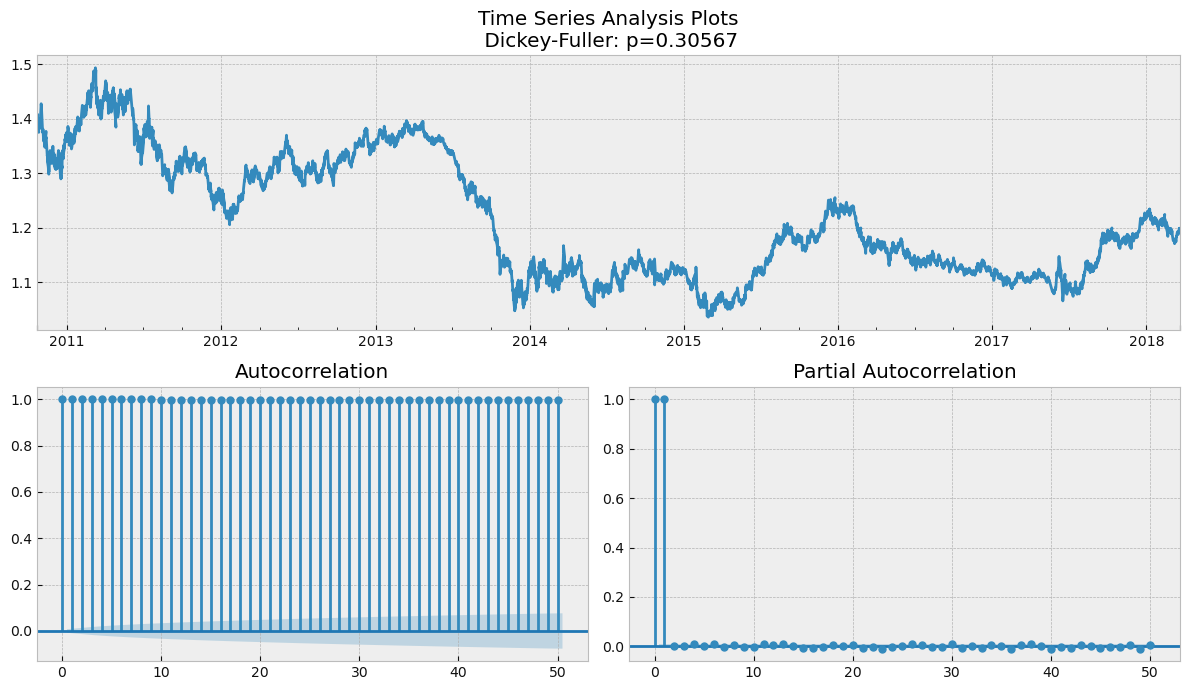

In [62]:
tsplot(EURUSD.close, lags=50)

Surprisingly, the initial series are stationary; the Dickey-Fuller test rejected the null hypothesis that a unit root is present. we do not have a visible trend, so the mean is constant and the variance is pretty much stable. The only thing left is seasonality, which we have to deal with prior to modeling. To do so, let's take the "seasonal difference", which means a simple subtraction of the series from itself with a lag that equals the seasonal period

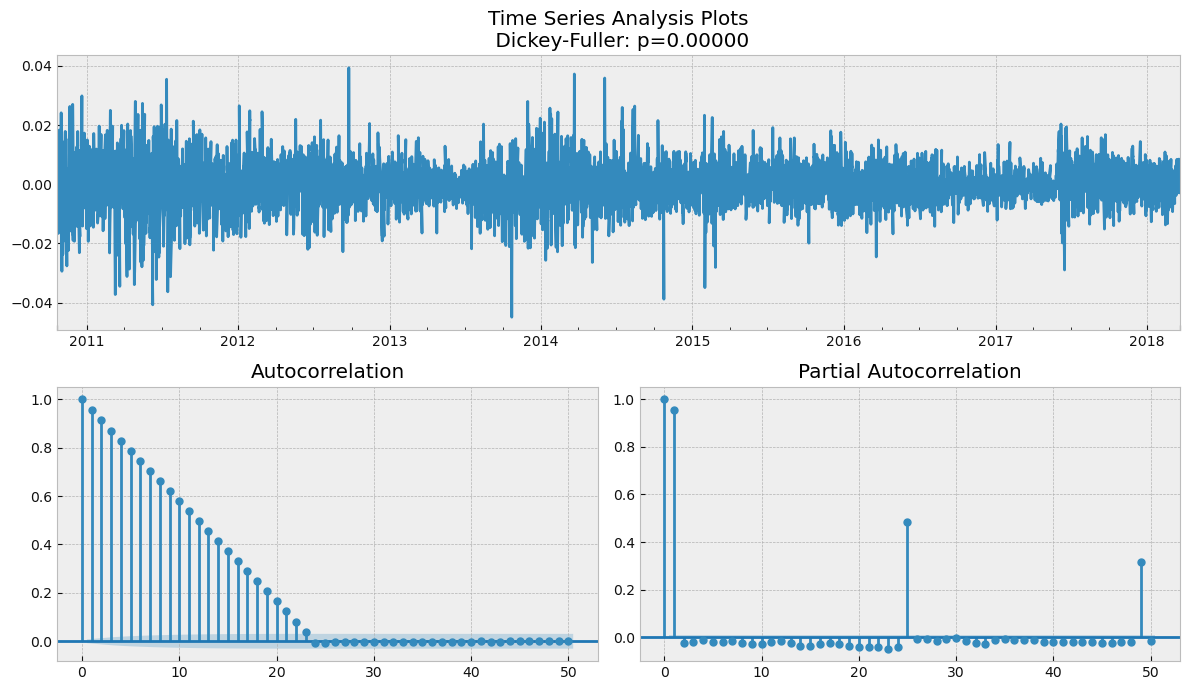

In [63]:
EURUSD_diff = EURUSD.close - EURUSD.close.shift(24)
tsplot(EURUSD_diff[24:], lags=50)

It is now much better with the visible seasonality gone.the autocorrelation function no not have many significant lags.oscillating around zero. The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped

# ARIMA-family

SARIMA(p,d,q)(P,D,Q,s) , Seasonal Autoregression Moving Average model:

AR(p) - autoregression model i.e. regression of the time series onto itself. The basic assumption is that the current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as p. To determine the initial p, you need to look at the PACF plot and find the biggest significant lag after which most other lags become insignificant.

MA(q) - moving average model. Without going into too much detail, this models the error of the time series, again with the assumption that the current error depends on the previous with some lag, which is referred to as q. The initial value can be found on the ACF plot with the same logic as before.

AR(p)+MA(q)=ARMA(p,q) 
What we have here is the Autoregressive–moving-average model! If the series is stationary, it can be approximated with these 4 letters. Let's continue.

I(d) - order of integration. This is simply the number of nonseasonal differences needed to make the series stationary. In our case, it's just 1 because we used first differences.
Adding this letter to the four gives us the ARIMA model which can handle non-stationary data with the help of nonseasonal differences. Great, one more letter to go!

S(s) - this is responsible for seasonality and equals the season period length of the series
With this, we have three parameters: (P,D,Q)
P - order of autoregression for the seasonal component of the model, which can be derived from PACF. But you need to look at
the number of significant lags, which are the multiples of the season period length. For example, if the period equals 24 and we see the 24-th and 48-th lags are significant in the PACF, that means the initial  P  should be 2.

Q  - similar logic using the ACF plot instead.

D  - order of seasonal integration. This can be equal to 1 or 0, depending on whether seasonal differeces were applied or not.

Now that we know how to set the initial parameters, let's have a look at the final plot once again and set the parameters

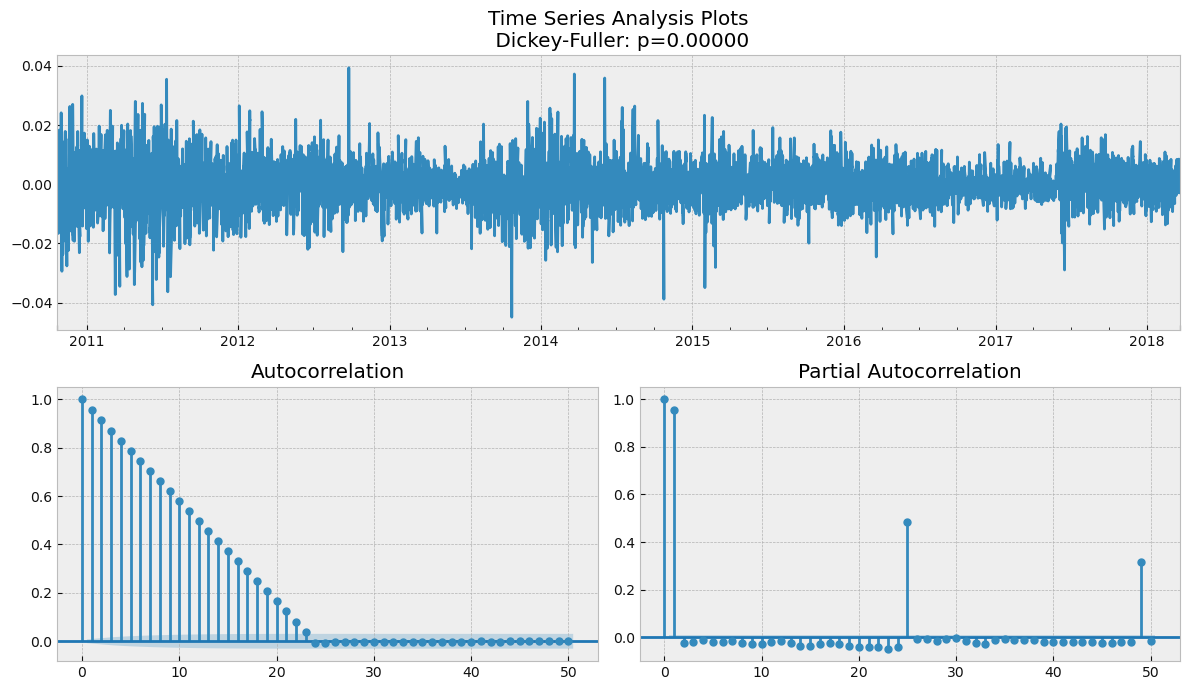

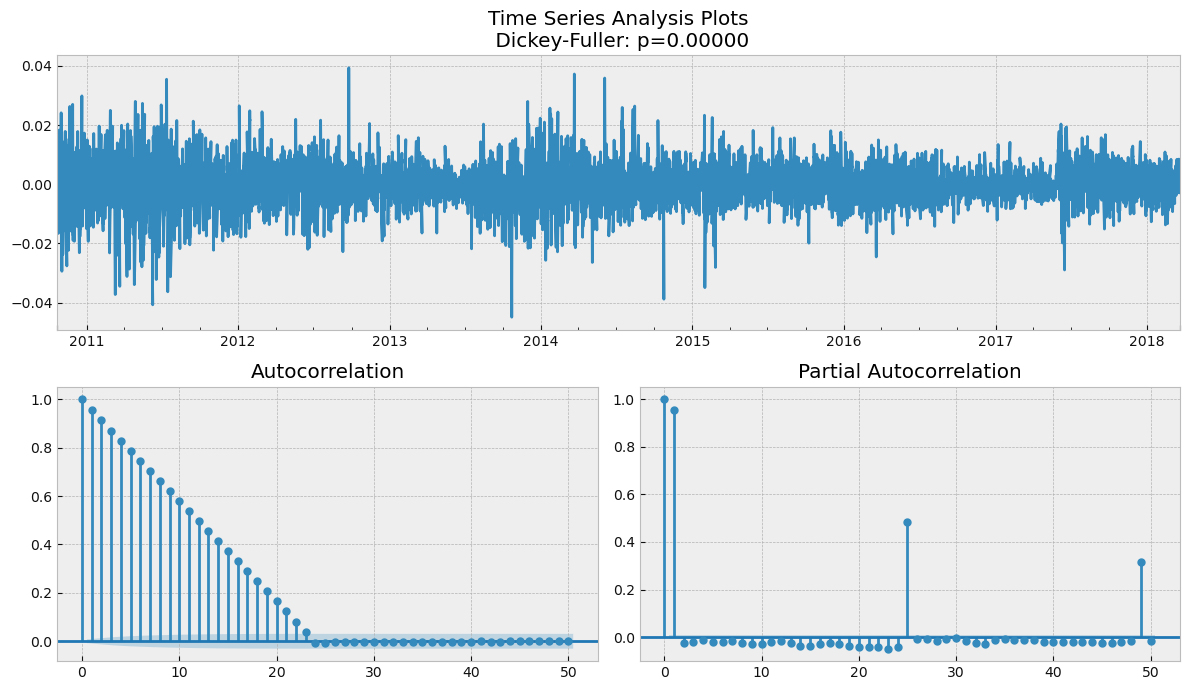

In [64]:
tsplot(EURUSD_diff[24:], lags=50)
tsplot(EURUSD_diff[24+1:], lags=50)

it seems no difference even if i add 1 into it
test various models and see which one is better

In [65]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    

In [66]:
def optimizeSARIMA(parameters_list, d, D, s):
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(EURUSD.close, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    return result_table

In [67]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\joeyh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\joeyh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\joeyh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\joeyh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Wall time: 1h 50min 23s


In [68]:
result_table.head()

parameters            aic
0  (3, 2, 0, 1) -666668.163632
1  (2, 2, 0, 1) -666666.236400
2  (2, 3, 0, 1) -666665.830299
3  (3, 3, 0, 1) -666665.655849
4  (3, 4, 0, 1) -666665.388545

In [69]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(EURUSD.close, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                close   No. Observations:                65000
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 24)   Log Likelihood              333341.082
Date:                              Sat, 12 Jun 2021   AIC                        -666668.164
Time:                                      22:13:49   BIC                        -666604.591
Sample:                                  10-21-2010   HQIC                       -666648.489
                                       - 03-21-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0509      0.001     43.033      0.000       0.049       0.053
ar.L2          0.35

Excellent! This provides an ARIMA Order of (3,1,2) combined with a seasonal order of (0,1,1,24) Now let's train & test the SARIMA(3,1,2)(0,1,1,24) model, evaluate it, then produce a forecast of future values.


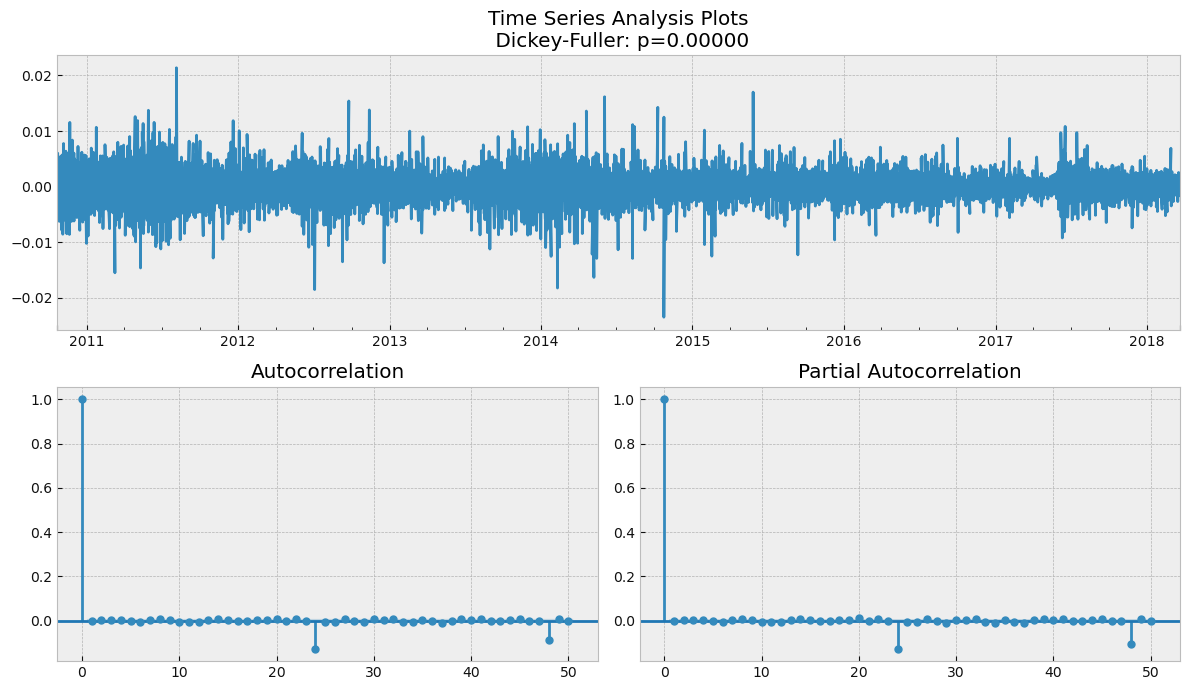

In [70]:
tsplot(best_model.resid[24+1:], lags=50)

It is clear that the residuals are stationary, and there are no apparent autocorrelations. Let's make predictions using our model.

### Split the data into train/test sets

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [72]:
# Set one year for testing
train = EURUSD.iloc[:-168]
test = EURUSD.iloc[-168:]

### Fit a SARIMA(3,1,2)(0,1,1,24) Model

In [73]:
model = SARIMAX(train['close'],order=(3,1,2),seasonal_order=(0,1,1,24))
results = model.fit()
results.summary()

C:\Users\joeyh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                close   No. Observations:                64832
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 24)   Log Likelihood              332418.411
Date:                              Sat, 12 Jun 2021   AIC                        -664822.821
Time:                                      22:19:44   BIC                        -664759.267
Sample:                                  10-21-2010   HQIC                       -664803.150
                                       - 03-14-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0510      0.001     43.073      0.000       0.049       0.053
ar.L2          0.3747      0.001    304.527      0.000       0.372       0.377
ar.L3         -0.0119      0.003     -4.456      0.000      -0.017      -0.007
ma.L1         -0.0487      0.001    -41.214      0.000      -0.051      -0.046
ma.L2         -0.3772      0.001   -306.445      0.000      -0.380      -0.375
ma.S.L24      -0.7522      0.002   -355.272      0.000      -0.756      -0.748
sigma2      2.051e-06    4.5e-09    456.192      0.000    2.04e-06    2.06e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):            404998.95
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.09e+16. Standard errors may be unstable.
"""

In [74]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,2)(0,1,1,24) Predictions')

In [75]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['close'][i]}")

predicted=1.186441139, expected=1.18681
predicted=1.186647907, expected=1.18699
predicted=1.186868601, expected=1.18724
predicted=1.186678067, expected=1.18664
predicted=1.186684582, expected=1.18664
predicted=1.186440188, expected=1.18698
predicted=1.186390676, expected=1.18708
predicted=1.186310643, expected=1.18728
predicted=1.186311406, expected=1.18731
predicted=1.186277347, expected=1.18816
predicted=1.186779391, expected=1.18838
predicted=1.186828104, expected=1.18813
predicted=1.186612874, expected=1.18647
predicted=1.186865186, expected=1.18622
predicted=1.186733761, expected=1.18797
predicted=1.187321377, expected=1.18926
predicted=1.188058247, expected=1.18972
predicted=1.188247755, expected=1.18988
predicted=1.188372845, expected=1.19037
predicted=1.188469165, expected=1.19215
predicted=1.188329679, expected=1.19179
predicted=1.188039334, expected=1.19172
predicted=1.188301276, expected=1.19135
predicted=1.188221903, expected=1.19124
predicted=1.18796609 , expected=1.19146


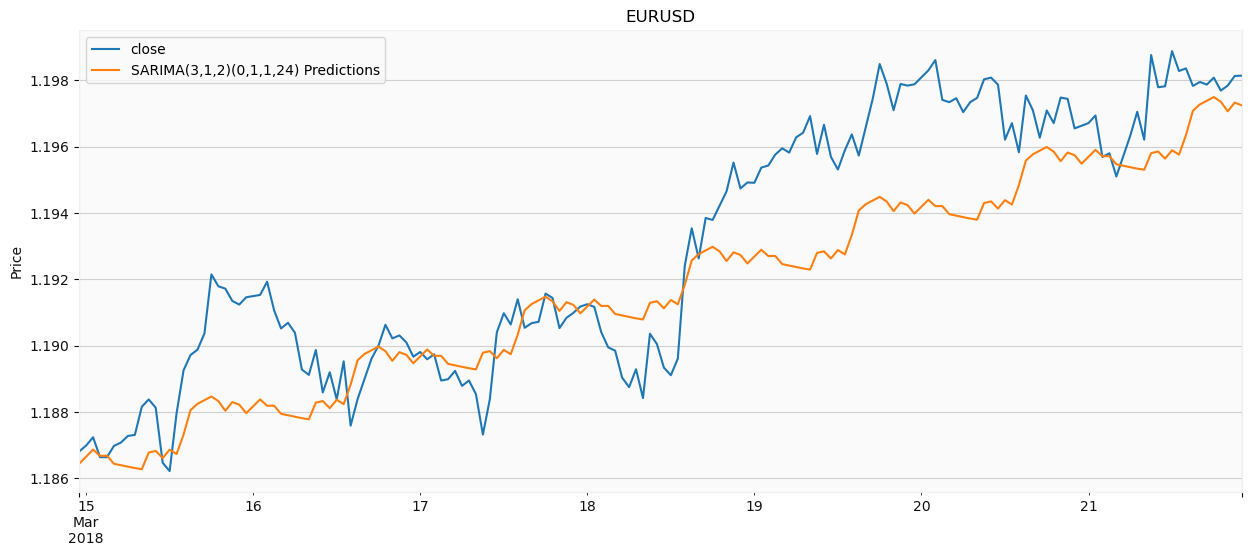

In [76]:
# Plot predictions against known values
title = 'EURUSD'
ylabel='Price'
xlabel=''

ax = test['close'].plot(legend=True,figsize=(15,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluate the Model

In [77]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['close'], predictions)
print(f'SARIMAx(3,1,2)(0,1,1,24) MSE Error: {error:11.10}')

SARIMAx(3,1,2)(0,1,1,24) MSE Error: 4.428079045e-06


In [78]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['close'], predictions)
print(f'SARIMAx(3,1,2)(0,1,1,24) RMSE Error: {error:11.10}')

SARIMAx(3,1,2)(0,1,1,24) RMSE Error: 0.002104300132


> ###  <font color='green'> * **CONCLUSION:** <br> These are outstanding result!! </font> 

### Retrain the model on the full data, and forecast the future

In [79]:
model = SARIMAX(EURUSD['close'],order=(3,1,2),seasonal_order=(0,1,1,24))
results = model.fit()
fcast = results.predict(len(EURUSD),len(EURUSD)+11,typ='levels').rename('SARIMAx(3,1,2)(0,1,1,24) Forecast')

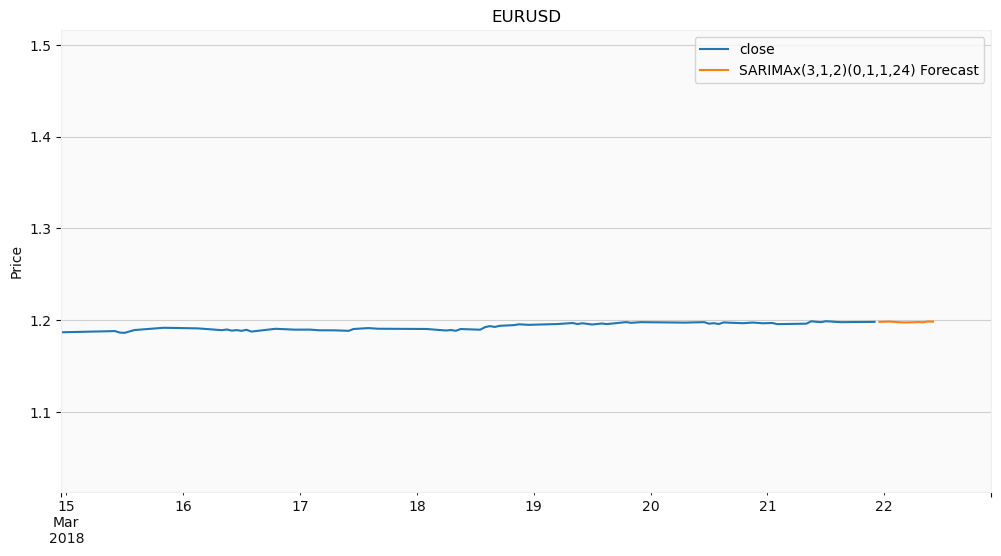

In [80]:
# Plot predictions against known values
title = 'EURUSD'
ylabel='Price'
xlabel=''

ax = EURUSD['close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True,xlim=[datetime.datetime(2018, 3, 14,23,0,0), datetime.datetime(2018, 3, 22,22,0)])
ax.set(xlabel=xlabel, ylabel=ylabel);

# Lags of Time Series

Shifting the series  n  steps back, we get a feature column where the current value of time series is aligned with its value at time  t−n . If we make a 1 lag shift and train a model on that feature, the model will be able to forecast 1 step ahead from having observed the current state of the series. Increasing the lag, say, up to 6, will allow the model to make predictions 6 steps ahead; however it will use data observed 6 steps back. If something fundamentally changes the series during that unobserved period, the model will not catch these changes and will return forecasts with a large error. Therefore, during the initial lag selection, one has to find a balance between the optimal prediction quality and the length of the forecasting horizon.

In [81]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(EURUSD.close.copy())
data.columns = ["y"]

In [82]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

In [83]:
# take a look at the new dataframe 
data.tail(7)

y    lag_6    lag_7    lag_8    lag_9   lag_10  \
2018-03-21 16:00:00  1.19795  1.19779  1.19876  1.19621  1.19705  1.19633   
2018-03-21 17:00:00  1.19787  1.19782  1.19779  1.19876  1.19621  1.19705   
2018-03-21 18:00:00  1.19808  1.19888  1.19782  1.19779  1.19876  1.19621   
2018-03-21 19:00:00  1.19769  1.19828  1.19888  1.19782  1.19779  1.19876   
2018-03-21 20:00:00  1.19784  1.19836  1.19828  1.19888  1.19782  1.19779   
2018-03-21 21:00:00  1.19813  1.19783  1.19836  1.19828  1.19888  1.19782   
2018-03-21 22:00:00  1.19814  1.19795  1.19783  1.19836  1.19828  1.19888   

                      lag_11   lag_12   lag_13   lag_14   lag_15   lag_16  \
2018-03-21 16:00:00  1.19570  1.19510  1.19580  1.19569  1.19694  1.19671   
2018-03-21 17:00:00  1.19633  1.19570  1.19510  1.19580  1.19569  1.19694   
2018-03-21 18:00:00  1.19705  1.19633  1.19570  1.19510  1.19580  1.19569   
2018-03-21 19:00:00  1.19621  1.19705  1.19633  1.19570  1.19510  1.19580   
2018-03-21 20:00:00  1.19876  1.19621  1.19705  1.19633  1.19570  1.19510   
2018-03-21 21:00:00  1.19779  1.19876  1.19621  1.19705  1.19633  1.19570   
2018-03-21 22:00:00  1.19782  1.19779  1.19876  1.19621  1.19705  1.19633   

                      lag_17   lag_18   lag_19   lag_20   lag_21   lag_22  \
2018-03-21 16:00:00  1.19663  1.19655  1.19744  1.19748  1.19671  1.19709   
2018-03-21 17:00:00  1.19671  1.19663  1.19655  1.19744  1.19748  1.19671   
2018-03-21 18:00:00  1.19694  1.19671  1.19663  1.19655  1.19744  1.19748   
2018-03-21 19:00:00  1.19569  1.19694  1.19671  1.19663  1.19655  1.19744   
2018-03-21 20:00:00  1.19580  1.19569  1.19694  1.19671  1.19663  1.19655   
2018-03-21 21:00:00  1.19510  1.19580  1.19569  1.19694  1.19671  1.19663   
2018-03-21 22:00:00  1.19570  1.19510  1.19580  1.19569  1.19694  1.19671   

                      lag_23   lag_24  
2018-03-21 16:00:00  1.19627  1.19710  
2018-03-21 17:00:00  1.19709  1.19627  
2018-03-21 18:00:00  1.19671  1.19709  
2018-03-21 19:00:00  1.19748  1.19671  
2018-03-21 20:00:00  1.19744  1.19748  
2018-03-21 21:00:00  1.19655  1.19744  
2018-03-21 22:00:00  1.19663  1.19655

we have generated a dataset here. and now we train a model

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

    """
        Perform train-test split with respect to time series structure
    """
    

In [85]:
def timeseries_train_test_split(X, y, test_size):
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [86]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [87]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [88]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

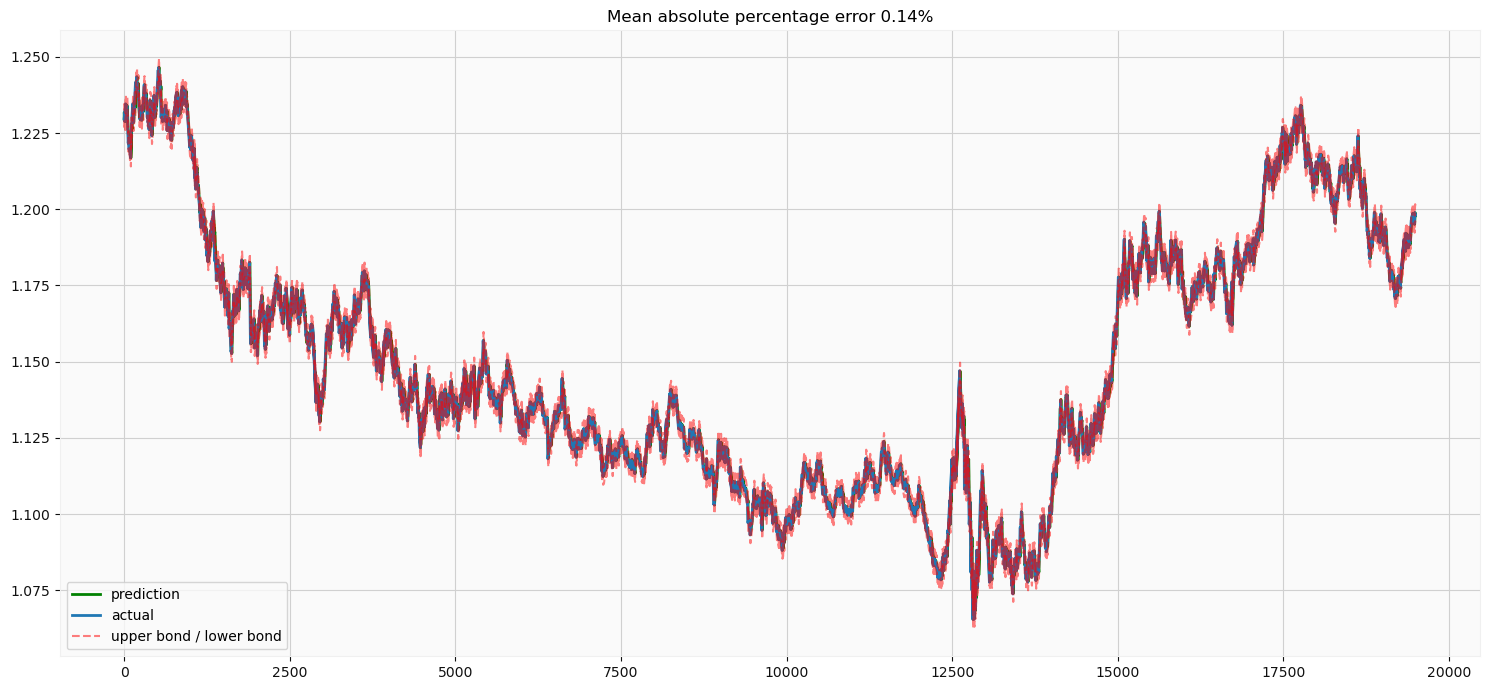

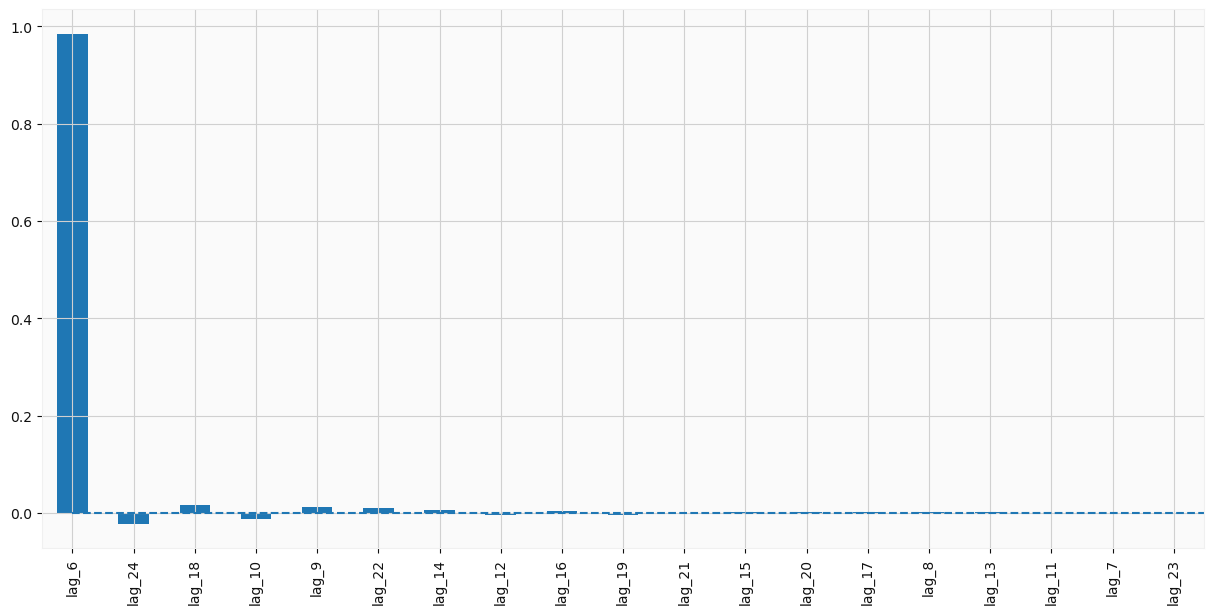

In [89]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

Simple lags and linear regression gave us predictions that are not that far off from SARIMA in terms of quality. There are many unnecessary features, so we'll do feature selection in a little while. For now, let's continue engineering

We'll add hour, day of week, and a boolean for is_weekend. To do so, we need to transform the current dataframe index into the datetime format and extract hour and weekday.

In [90]:
data.index = pd.to_datetime(data.index)
data["year"] = data.index.year
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.tail()

y    lag_6    lag_7    lag_8    lag_9   lag_10  \
2018-03-21 18:00:00  1.19808  1.19888  1.19782  1.19779  1.19876  1.19621   
2018-03-21 19:00:00  1.19769  1.19828  1.19888  1.19782  1.19779  1.19876   
2018-03-21 20:00:00  1.19784  1.19836  1.19828  1.19888  1.19782  1.19779   
2018-03-21 21:00:00  1.19813  1.19783  1.19836  1.19828  1.19888  1.19782   
2018-03-21 22:00:00  1.19814  1.19795  1.19783  1.19836  1.19828  1.19888   

                      lag_11   lag_12   lag_13   lag_14  ...   lag_19  \
2018-03-21 18:00:00  1.19705  1.19633  1.19570  1.19510  ...  1.19663   
2018-03-21 19:00:00  1.19621  1.19705  1.19633  1.19570  ...  1.19671   
2018-03-21 20:00:00  1.19876  1.19621  1.19705  1.19633  ...  1.19694   
2018-03-21 21:00:00  1.19779  1.19876  1.19621  1.19705  ...  1.19569   
2018-03-21 22:00:00  1.19782  1.19779  1.19876  1.19621  ...  1.19580   

                      lag_20   lag_21   lag_22   lag_23   lag_24  year  hour  \
2018-03-21 18:00:00  1.19655  1.19744  1.19748  1.19671  1.19709  2018    18   
2018-03-21 19:00:00  1.19663  1.19655  1.19744  1.19748  1.19671  2018    19   
2018-03-21 20:00:00  1.19671  1.19663  1.19655  1.19744  1.19748  2018    20   
2018-03-21 21:00:00  1.19694  1.19671  1.19663  1.19655  1.19744  2018    21   
2018-03-21 22:00:00  1.19569  1.19694  1.19671  1.19663  1.19655  2018    22   

                     weekday  is_weekend  
2018-03-21 18:00:00        2           0  
2018-03-21 19:00:00        2           0  
2018-03-21 20:00:00        2           0  
2018-03-21 21:00:00        2           0  
2018-03-21 22:00:00        2           0  

[5 rows x 24 columns]

In [91]:
# del(data['is_weekend'])

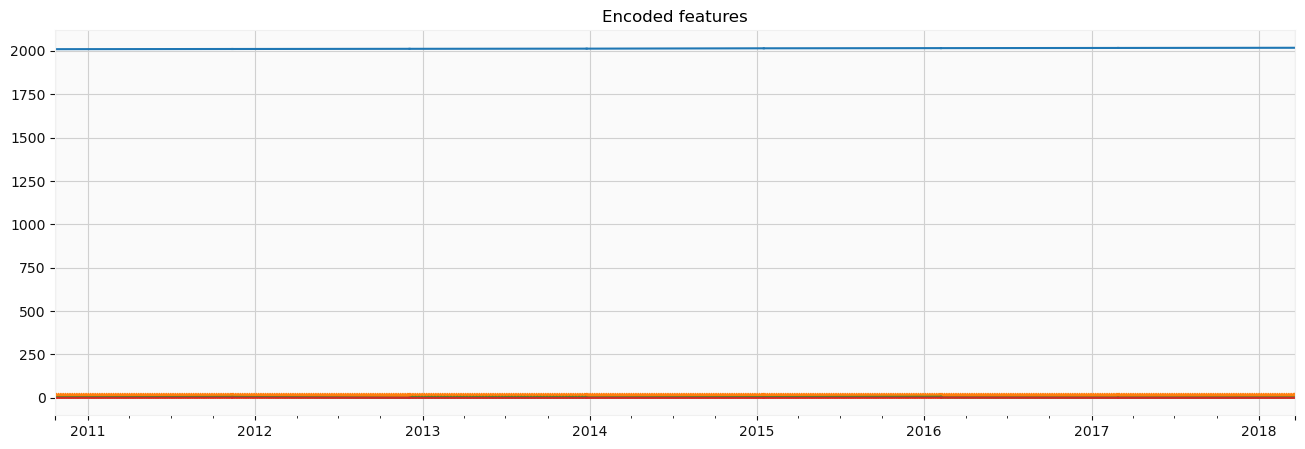

In [92]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.year.plot()
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

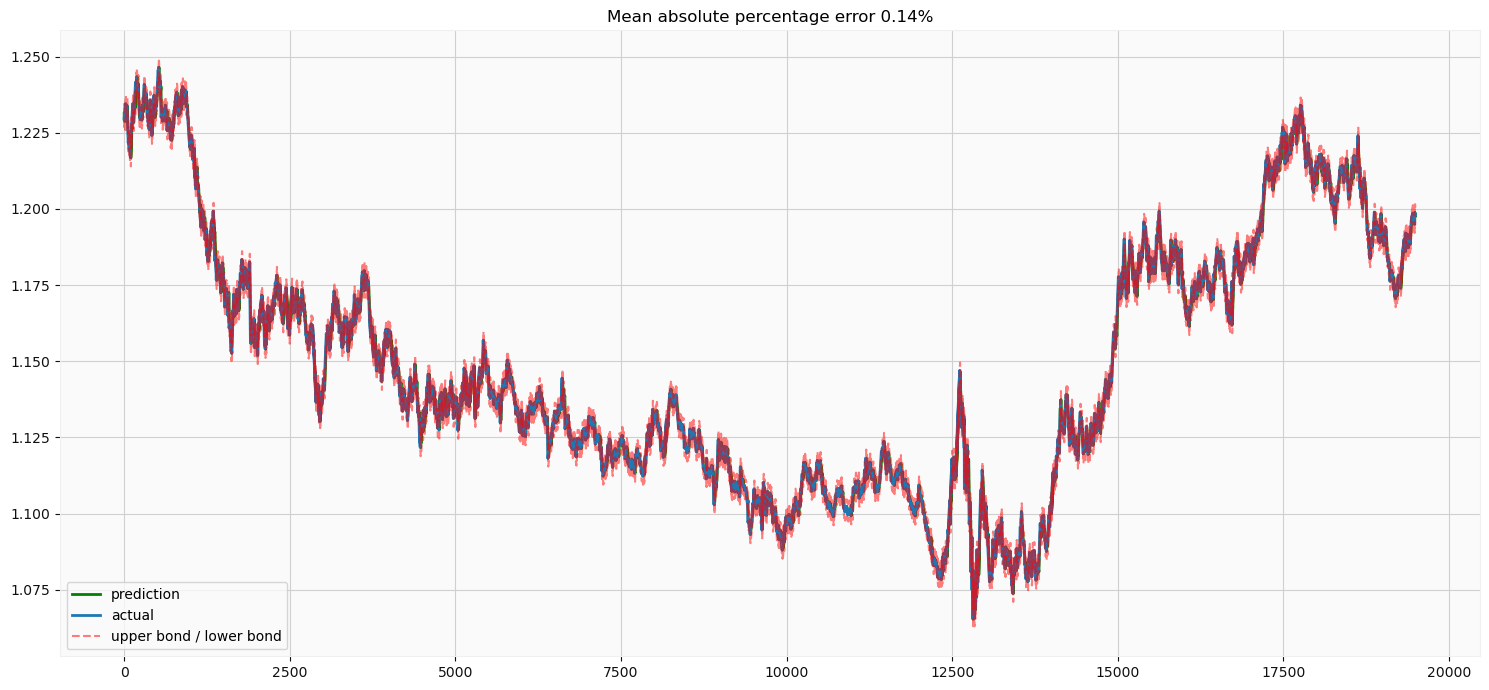

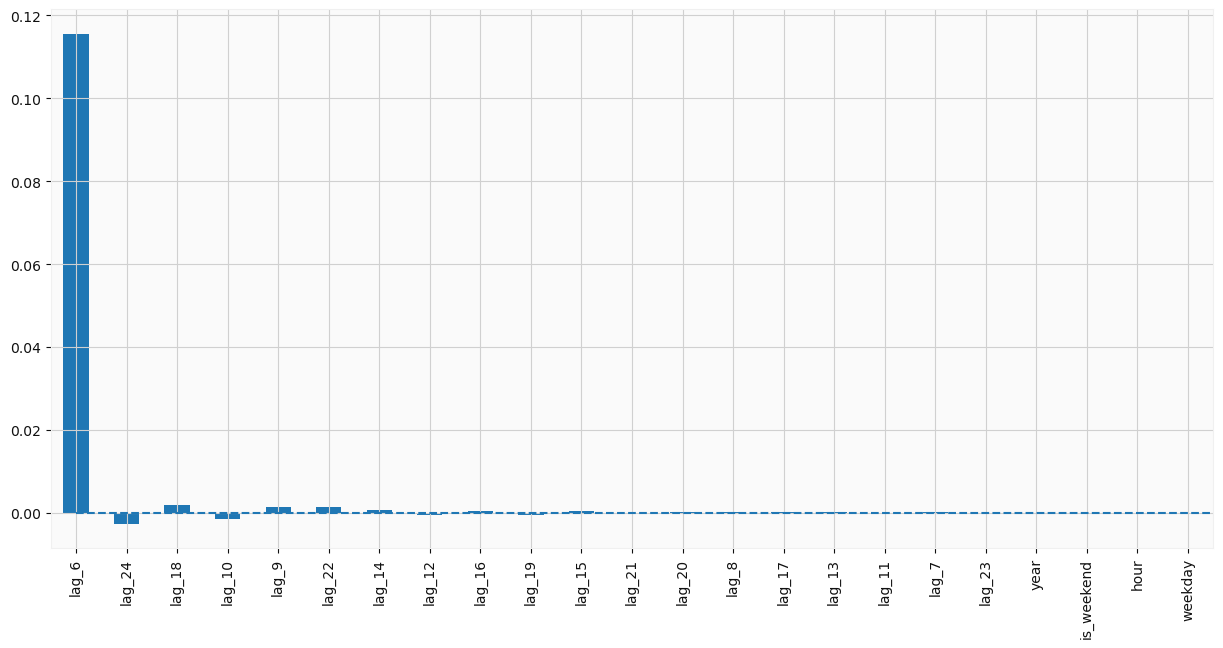

In [94]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """

In [95]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

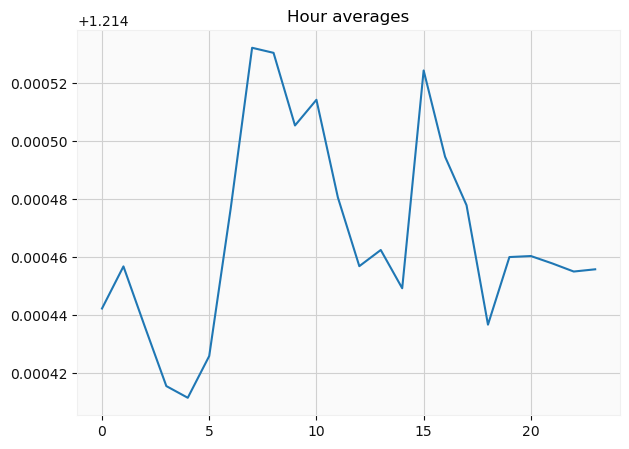

In [96]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);


    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    

In [97]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
        # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['year'] = data.index.year
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['year_average'] = list(map(code_mean(data[:test_index], 'year', "y").get, data.year))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "year"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test
    

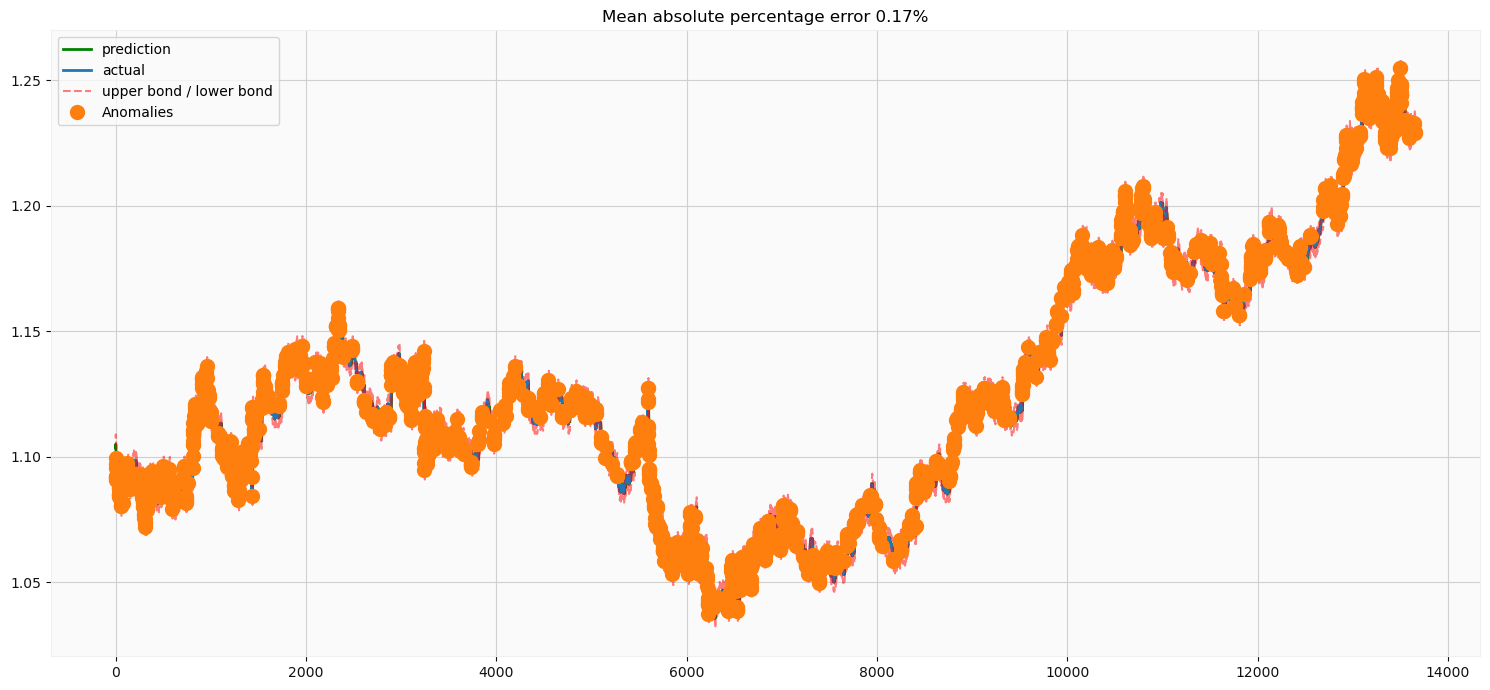

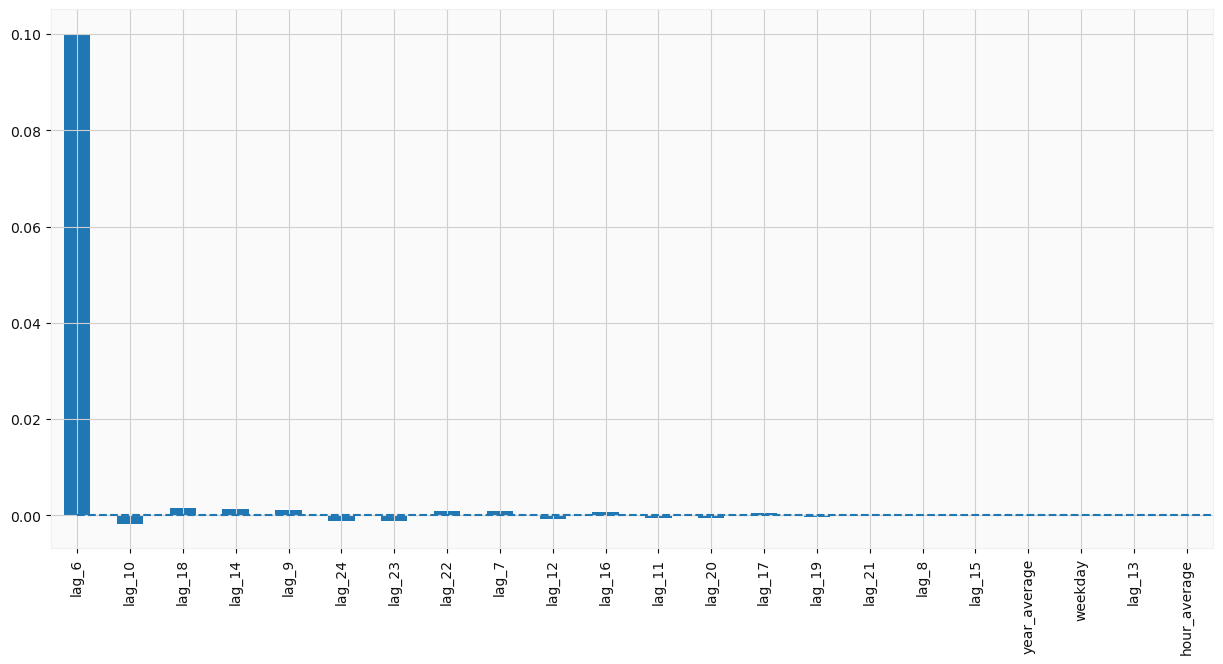

In [98]:
X_train, X_test, y_train, y_test = prepareData(EURUSD.close, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

In [99]:
X_train, X_test, y_train, y_test =\
prepareData(EURUSD.close, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

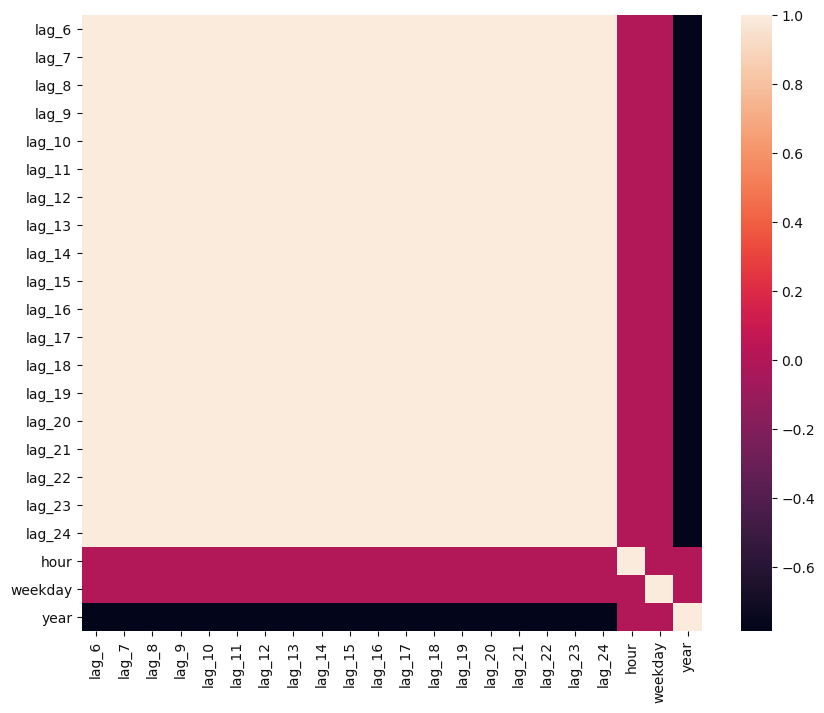

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

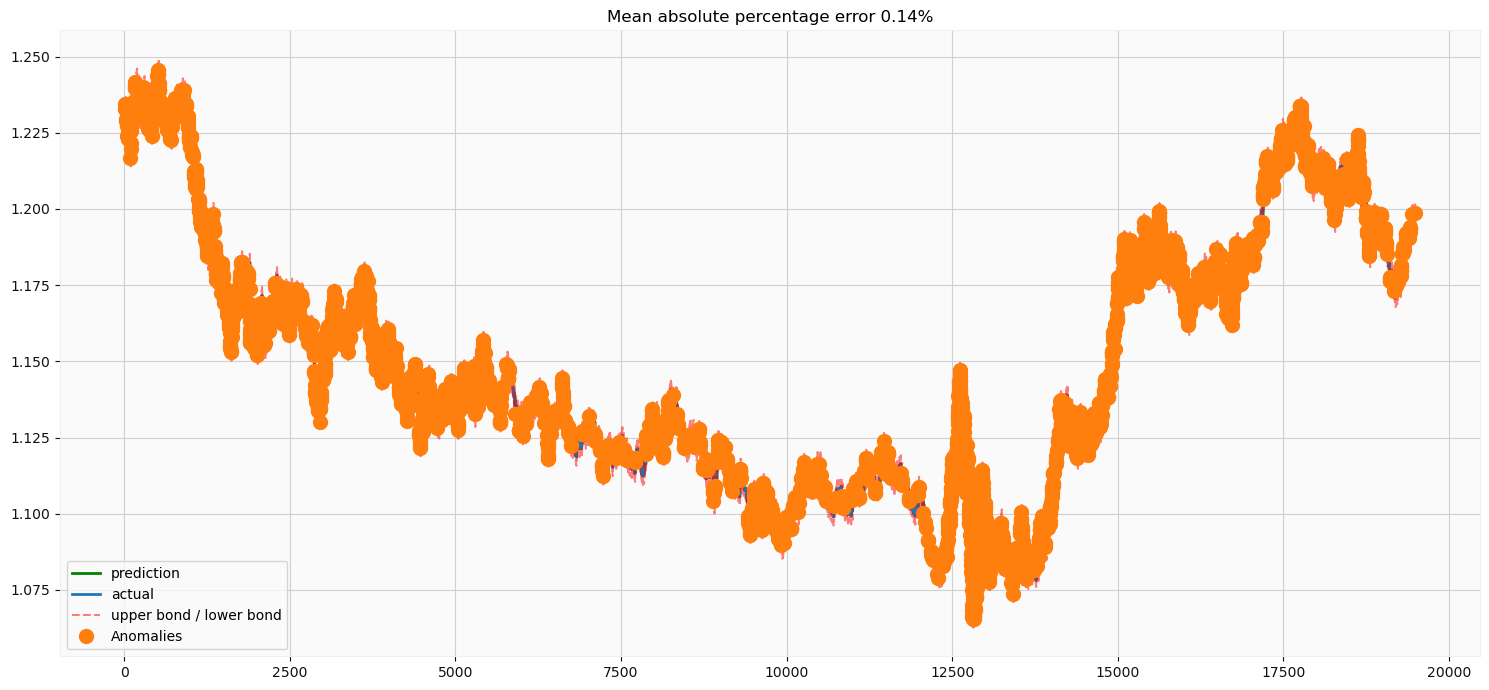

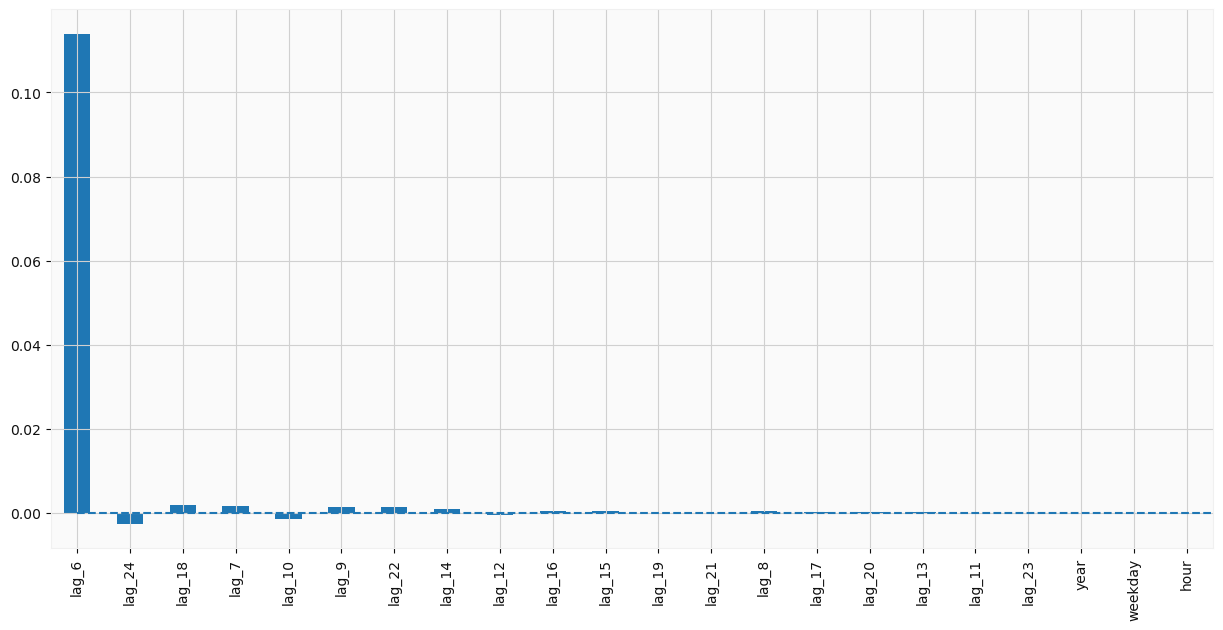

In [101]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

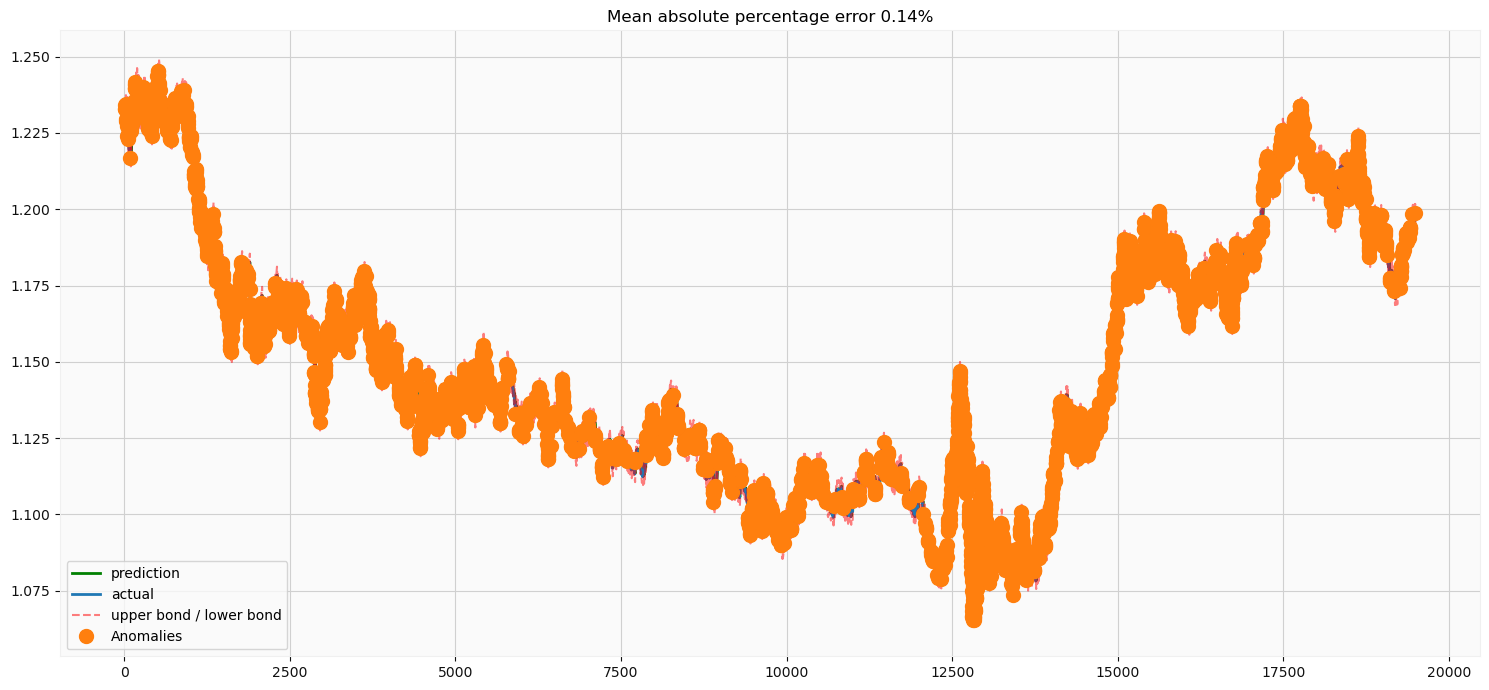

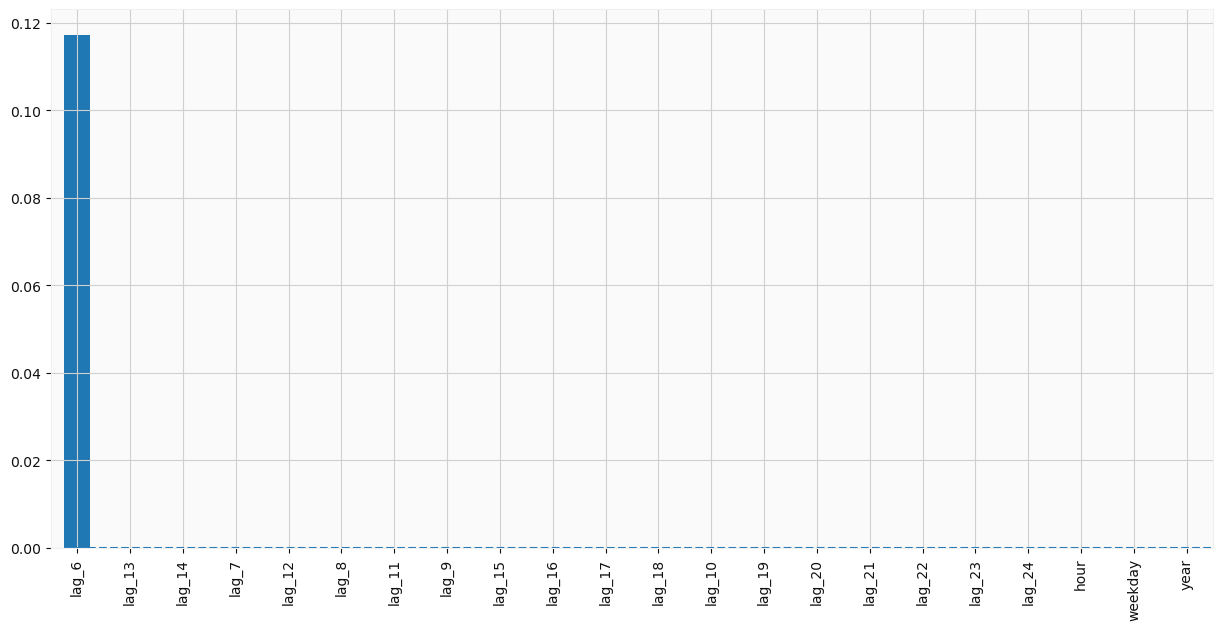

In [102]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

In [103]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

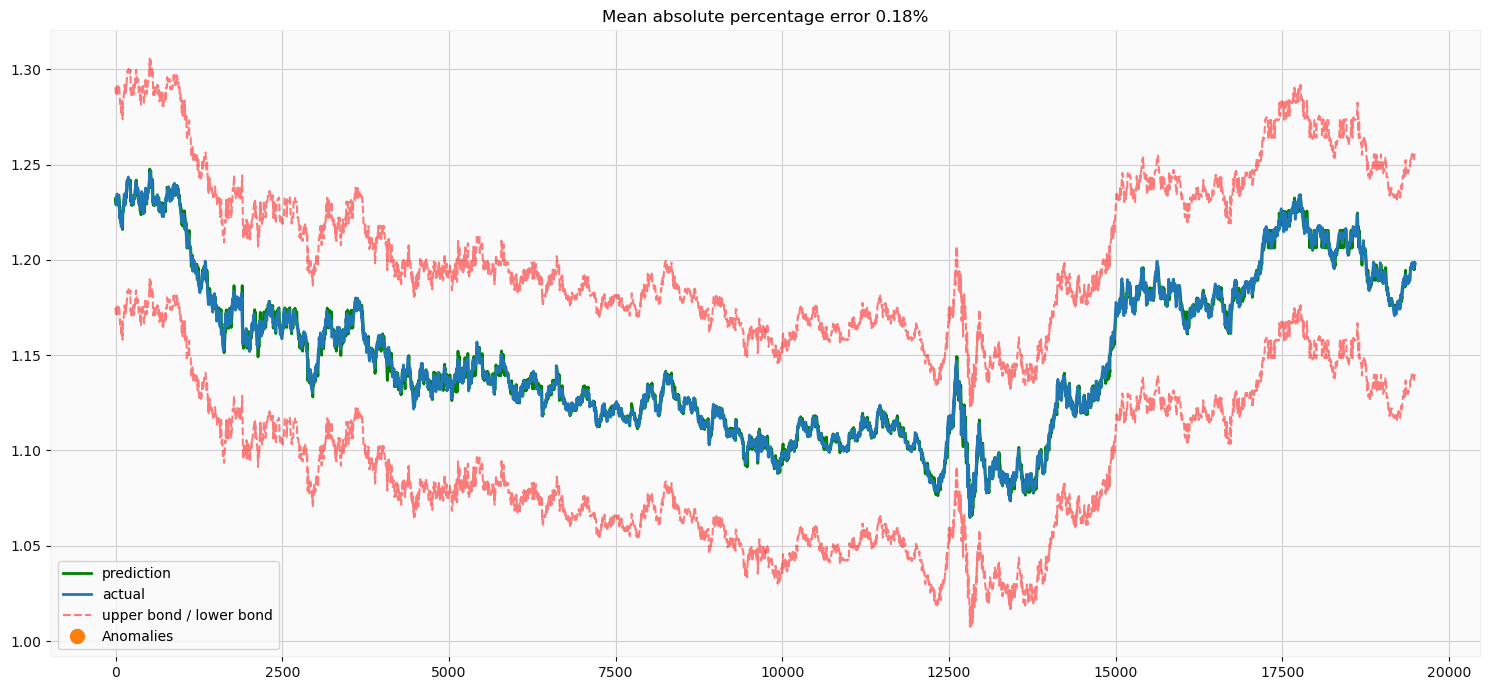

In [104]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

# THE END